# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 yellowbrick==1.5 -q --user

In [ ]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.2 yellowbrick==1.5 -q --user
# !pip install --upgrade -q jinja2

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [4]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
## Complete the code to import the data
data = pd.read_csv('/content/drive/MyDrive/dataset/stock_data.csv')

In [6]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

## Data Overview

- Observations
- Sanity checks

### Checking the shape of the dataset

In [7]:
# checking shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 340 rows and 15 columns.


### Displaying few rows of the dataset

In [8]:
# viewing a random sample of the dataset
df.sample(n=10, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.55,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.31,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.52,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.28,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.23,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.56,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.79,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.14,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.26,4.283628e+08,14.814159,4.218620


Observation

This dataset can be used for financial analysis, valuation, and comparison of companies within different sectors:

- There is a variety of sectors represented: Energy, Information Technology, Real Estate, Consumer Staples, Consumer Discretionary, and Financials.

- Price change and volatility vary widely across companies.

- P/E Ratio and P/B Ratio provide insights into the company's valuation in comparison to its earnings and book value, respectively.

- Some companies show negative net income and earnings per share, reflecting financial difficulties (e.g., Devon Energy Corp. and Occidental Petroleum).

- Some companies have relatively high ROE (e.g., Devon Energy Corp. with 205), indicating efficient use of equity to generate profits, while others have low or negative ROE (e.g., Halliburton Co. with 4).

- Net cash flow and net income vary in magnitude and direction, with both positive and negative values indicating different financial health scenarios.

### Checking the data types of the columns for the dataset

In [9]:
# checking the column names and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

Observation

 - There are 11 numeric (float and int datatype) and 4 string (object datatype) columns in the data.

 -There are no missing values in the dataset.

### Checking for duplicates and missing values

In [10]:
# checking for duplicate values
df.duplicated().sum()

0

Observation

- There are no duplicate in the dataset.

In [11]:
# checking for missing values in the data
df.isna().sum()

,0
Ticker Symbol,0
Security,0
GICS Sector,0
GICS Sub Industry,0
Current Price,0
Price Change,0
Volatility,0
ROE,0
Cash Ratio,0
Net Cash Flow,0


Observation

- There are no missing values in the dataset.

### Statistical summary of the dataset

In [12]:
# Let's check the statistical summary of the data.
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


Observation

- The dataset represents a diverse group of companies in terms of sectors, financial metrics, and stock performance.

- Several metrics exhibit significant variability (e.g., net income, net cash flow, ROE, P/E ratio), suggesting the presence of outliers or a broad range of company sizes and financial health.

- Negative values in metrics like P/B ratio, net income, and price change highlight companies with potential financial challenges or underperformance.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

### Univariate analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Current Price

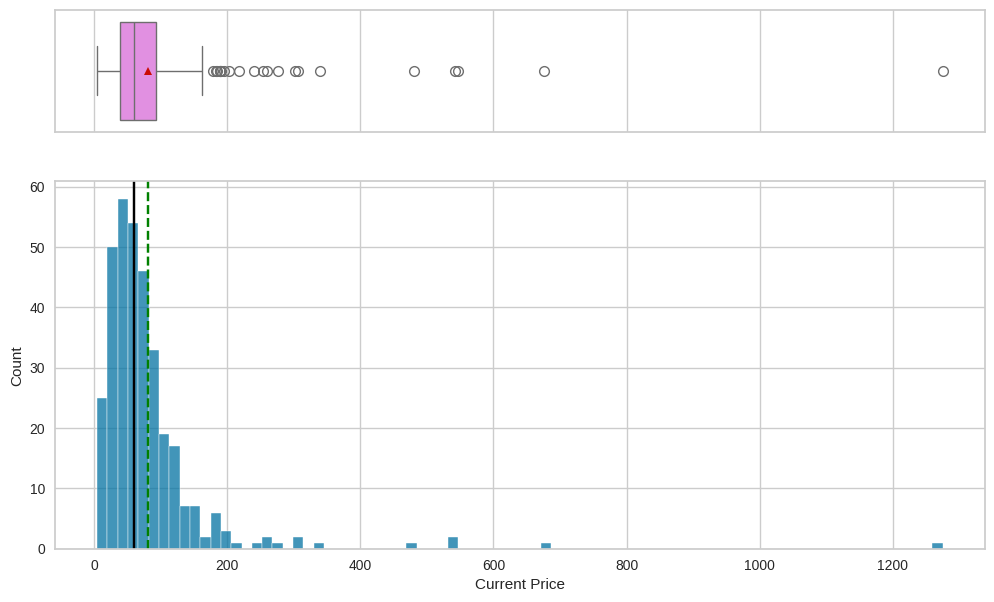

In [15]:
histogram_boxplot(df, 'Current Price')

Observation

The data is heavily right-skewed, with most "Current Price" values concentrated between 0 and 200, while a few high outliers significantly increase the mean.

#### Price Change

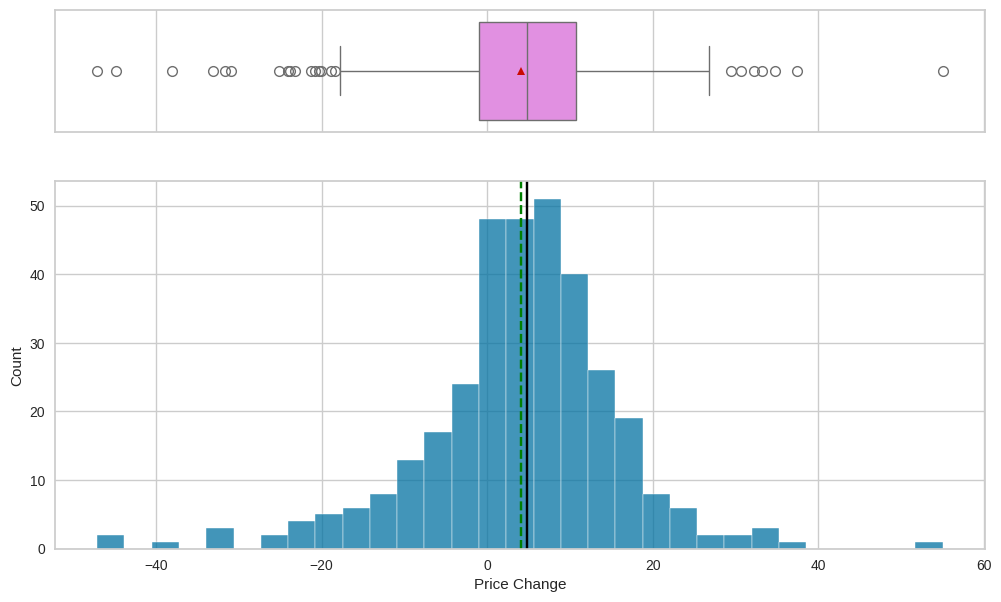

In [16]:
histogram_boxplot(df,'Price Change')

Observation

- The "Price Change" data is nearly symmetric and follows a normal distribution, with slight positive skewness and a few outliers on both ends.

#### Volatility

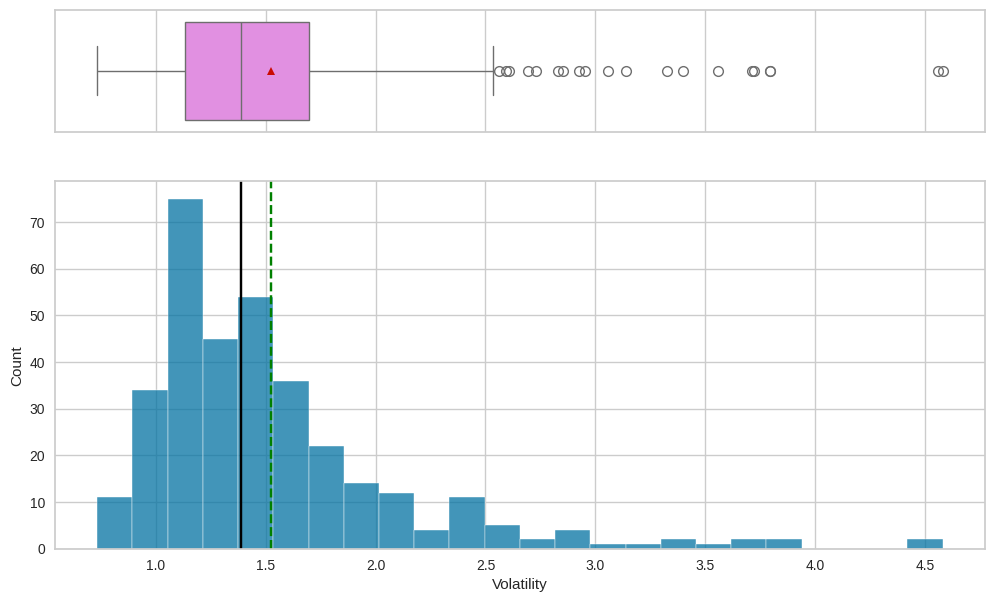

In [17]:
histogram_boxplot(df,'Volatility')

Observation

- The "Volatility" data is heavily concentrated around low values (1.0–1.5) but exhibits a right skew due to a few high outliers.

#### ROE

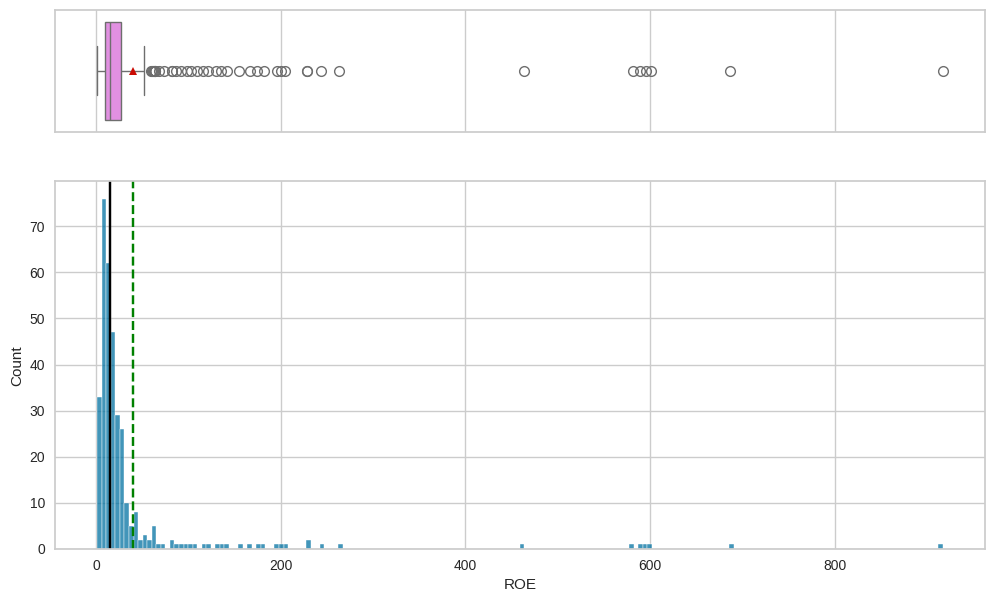

In [18]:
histogram_boxplot(df,'ROE')

Observation

- The data shows highly concentrated ROE values near the lower range with several extreme outliers. Most ROE values are low, while a few significantly high values create a long tail.

#### Cash Ratio

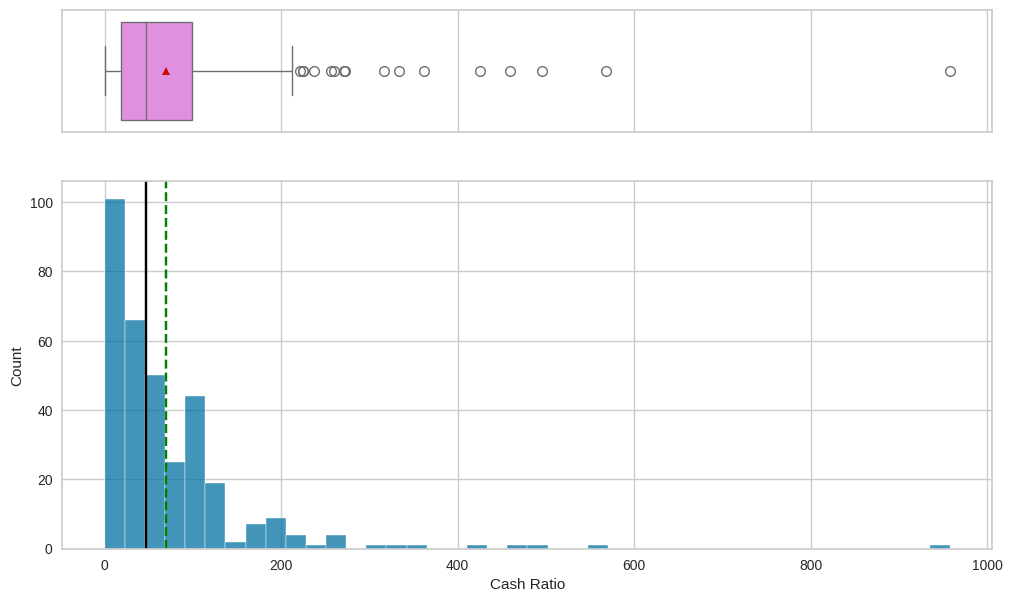

In [19]:
histogram_boxplot(df,'Cash Ratio')

Observation

- The Cash Ratio data is heavily concentrated in the lower range, with a few extreme outliers creating a long right tail. Most values are near the median, with a steep decline as the ratio increases.

#### Net Cash Flow

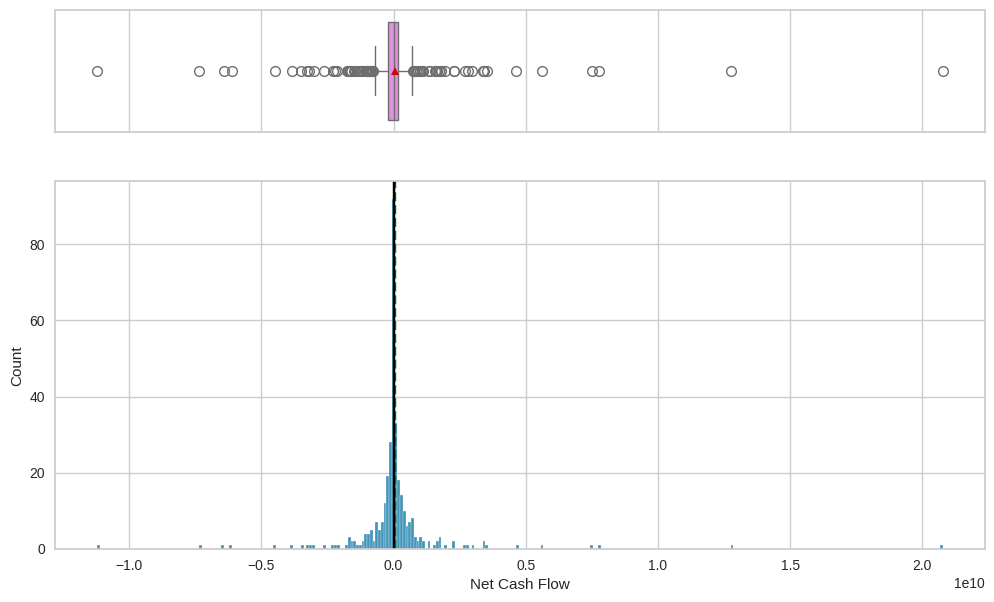

In [20]:
histogram_boxplot(df,'Net Cash Flow')

Observation

- The Net Cash Flow data is tightly clustered around zero, with a symmetric distribution and numerous outliers on both the positive and negative sides.

#### Net Income

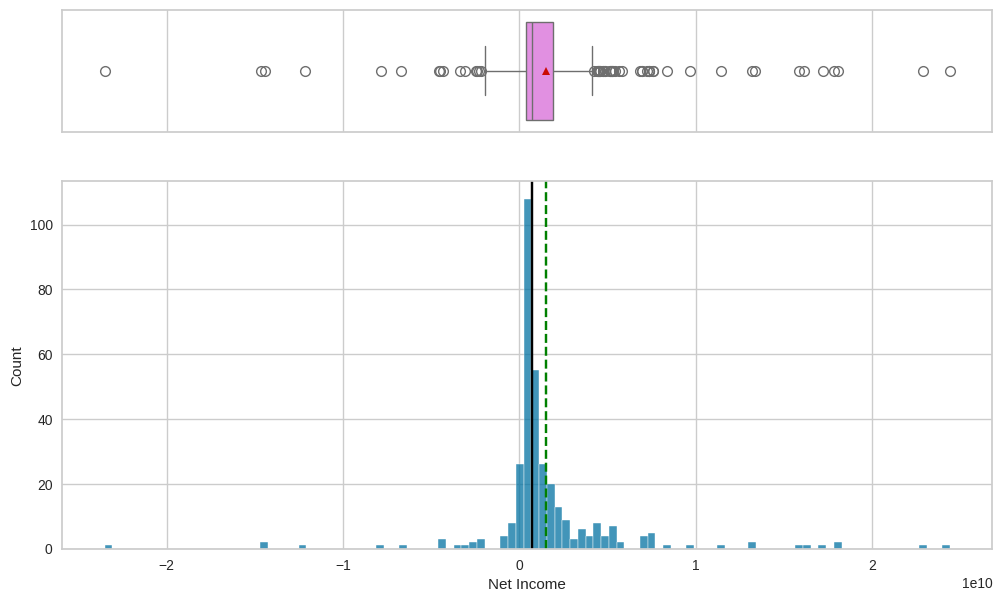

In [21]:
histogram_boxplot(df,'Net Income')

Observation

- The visualization highlights a right-skewed distribution of Net Income, with most values clustered near zero and several extreme outliers on both ends.

#### Earnings Per Share

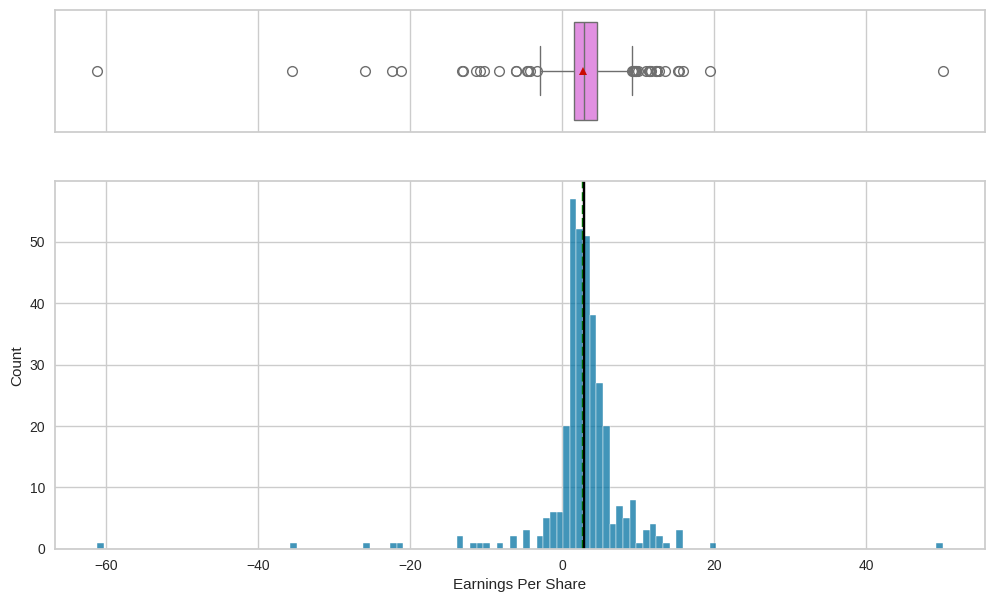

In [22]:
histogram_boxplot(df,'Earnings Per Share')

Observation

- The visualization shows an approximately symmetric distribution of Earnings Per Share (EPS), with most values concentrated near zero and outliers on both ends.

#### Estimated Shares Outstanding

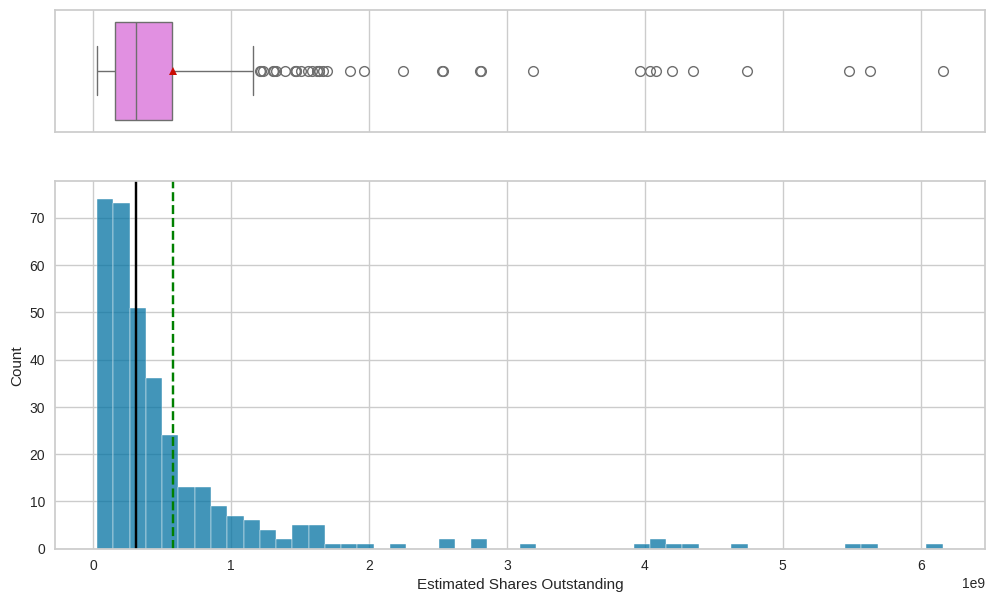

In [23]:
histogram_boxplot(df,'Estimated Shares Outstanding')

Observation

- The visualization shows a highly right-skewed distribution of Estimated Shares Outstanding, with most values concentrated near zero and a long tail of outliers extending to higher values.

#### P/E Ratio

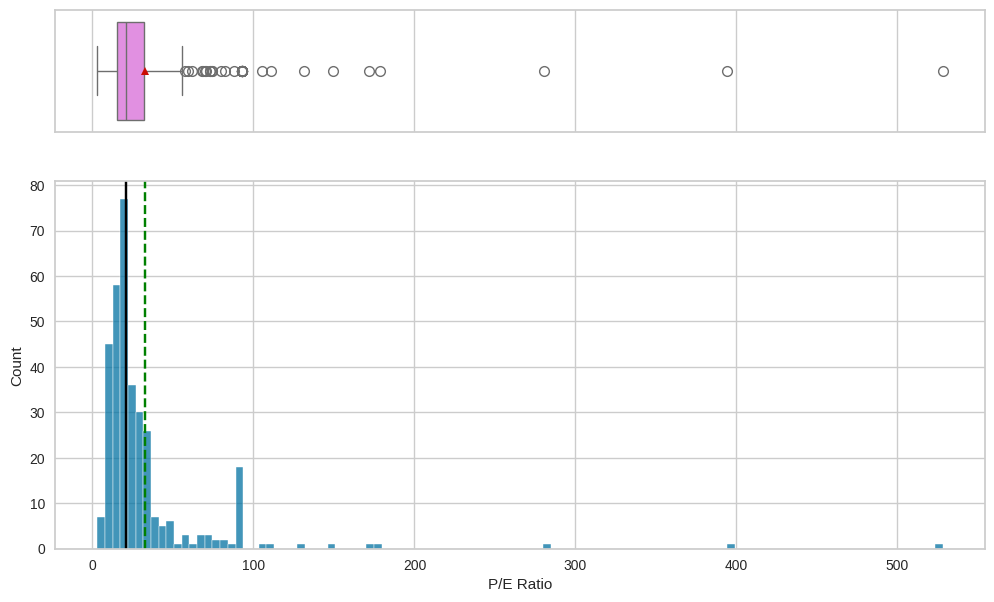

In [24]:
histogram_boxplot(df,'P/E Ratio')

Observation

- The plots depict the distribution of the Price-to-Earnings (P/E) Ratio, with most values concentrated below the upper whisker and noticeable outliers. The red triangle indicates the mean.

#### P/B Ratio

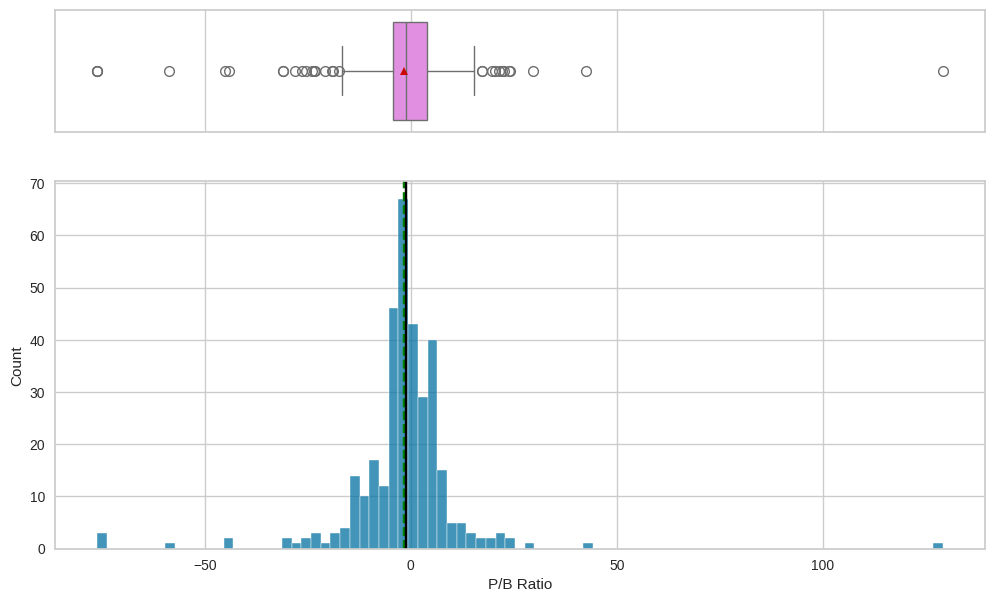

In [25]:
histogram_boxplot(df,'P/B Ratio')

Observation

- The charts show the distribution of the Price-to-Book (P/B) Ratio, with most values near zero, noticeable outliers on both ends, and the red triangle marking the mean.

#### GICS Sector

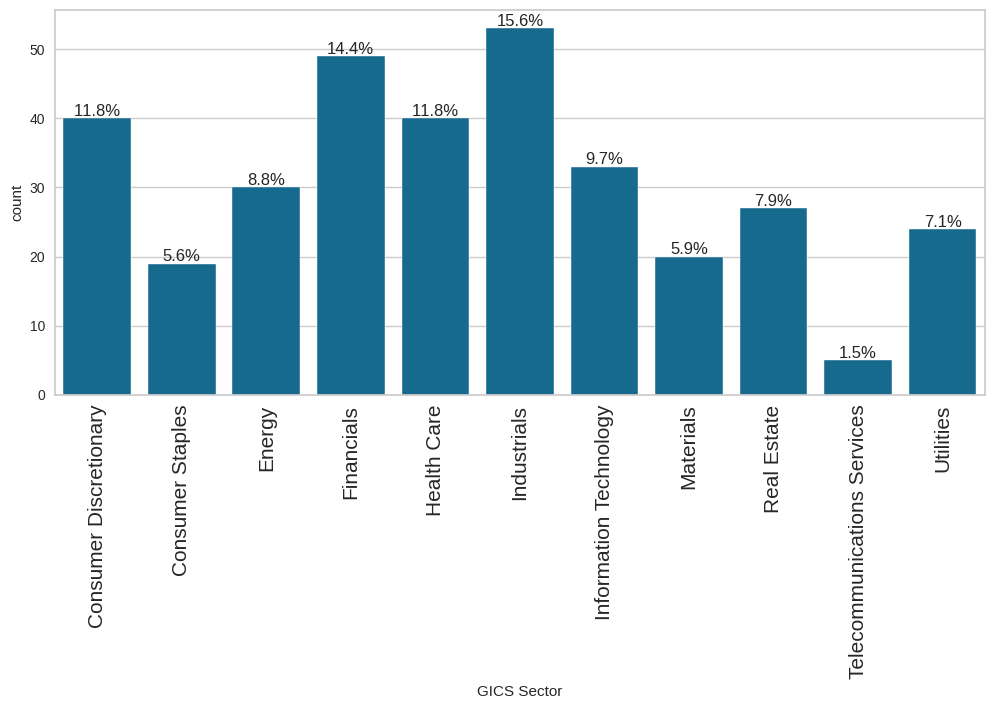

In [26]:
labeled_barplot(df, 'GICS Sector', perc=True)

Observation

- This distribution underscores the dominance of specific sectors like Industrials and Financials, with others being less emphasized.

- Industrials lead with 15.6%, followed by Financials at 14.4%. Together, they account for nearly one-third of the total representation.

- Consumer Discretionary and Health Care are equally represented at 11.8% each, showing significant contributions.

- Information Technology (9.7%) and Energy (8.8%) have moderate shares, while Real Estate contributes 7.9%.

- Utilities (7.1%), Materials (5.9%), and Consumer Staples (5.6%) have lower representation.

- Telecommunications Services is the least represented at just 1.5%, indicating minimal focus or activity in this sector.

#### GICS Sub Industry

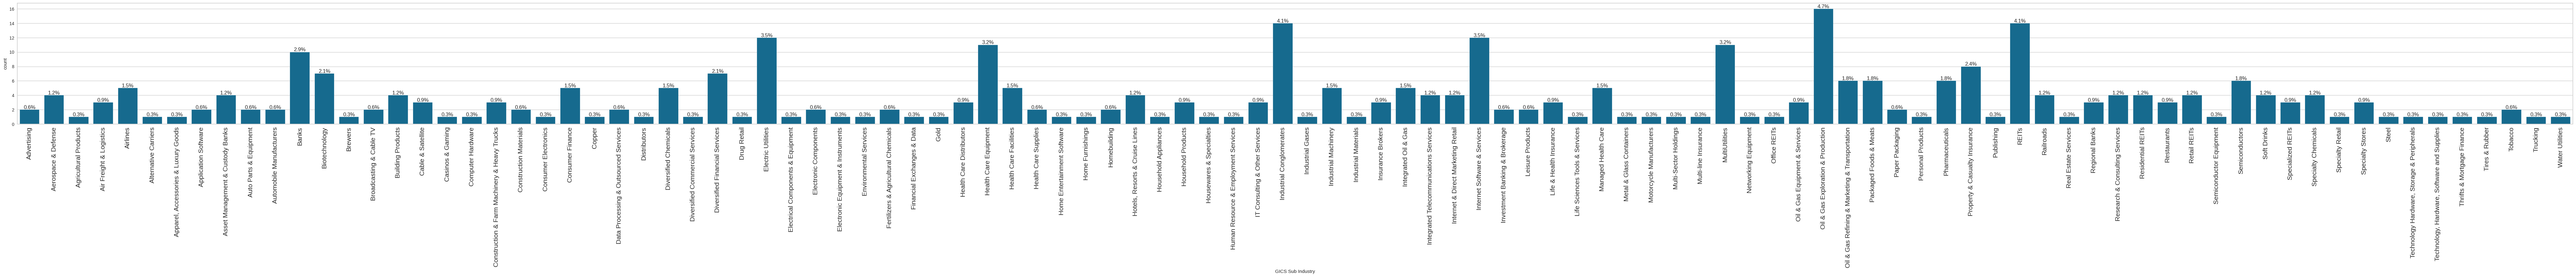

In [27]:
labeled_barplot(df, 'GICS Sub Industry', perc=True)

Observation

- The dominant entities, including Electric Utilities, Health Care Equipment, Industrial Conglomerates, Internet Software & Services, Multi-Utilities, Oil & Gas Exploration, and REITs, exhibit significantly higher counts, with peaks exceeding 3%. These entities emerge as the primary contributors and key players in the dataset.

- Several entities cluster around 1-2%, contributing meaningfully but not dominating the dataset.

- A large portion of entities is below 1%, indicating either minimal activity or lesser focus in the dataset.

### Bivariate Analysis

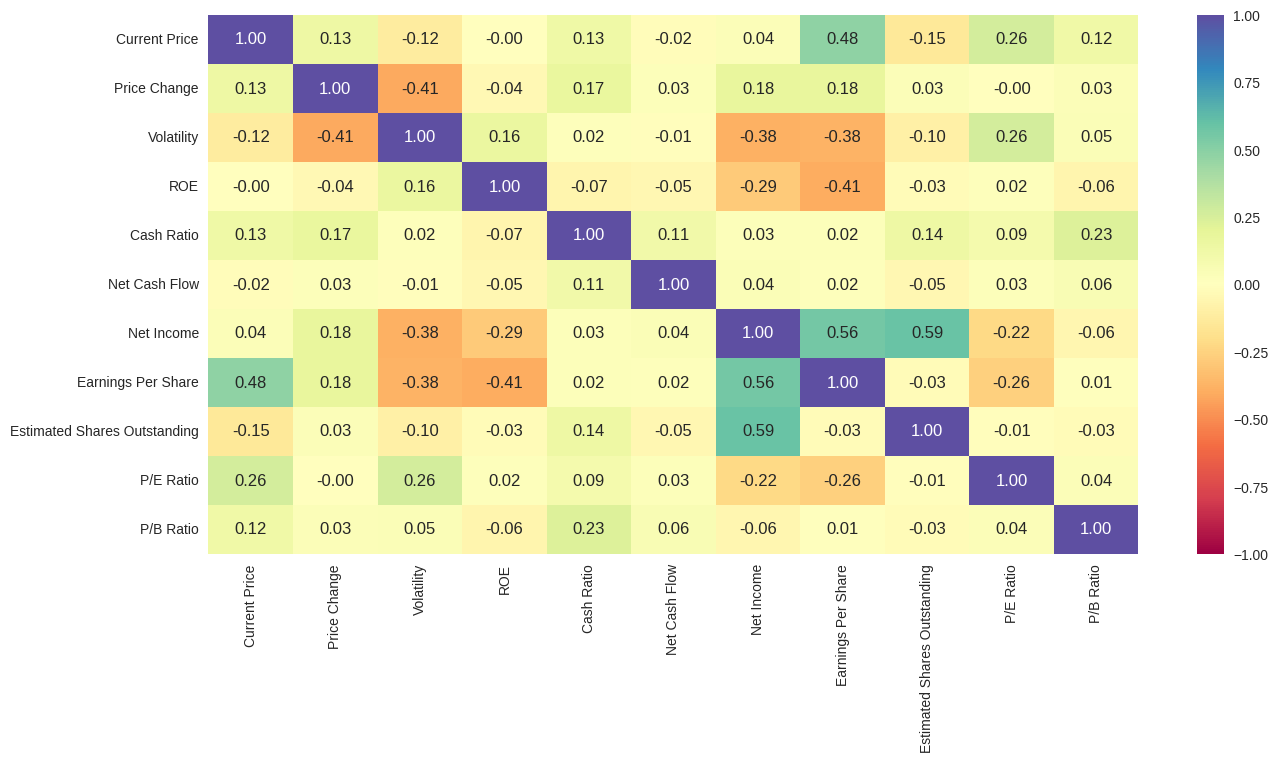

In [28]:
# correlation check
plt.figure(figsize=(15, 7))
num_df = df.select_dtypes(include=np.number) # Selecting only numerical columns for correlation calculation
sns.heatmap(
    num_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observation

- Metrics such as EPS (Earnings Per Share), Current Price, and Net Income show significant correlations, indicating that higher earnings per share are linked to higher net income, and stocks with higher current prices are often associated with higher EPS.

- Volatility has a negative association with profitability-related metrics (Net Income, EPS).

- Relationships between other metrics, such as Net Cash Flow and P/E Ratio, are relatively weak.


**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

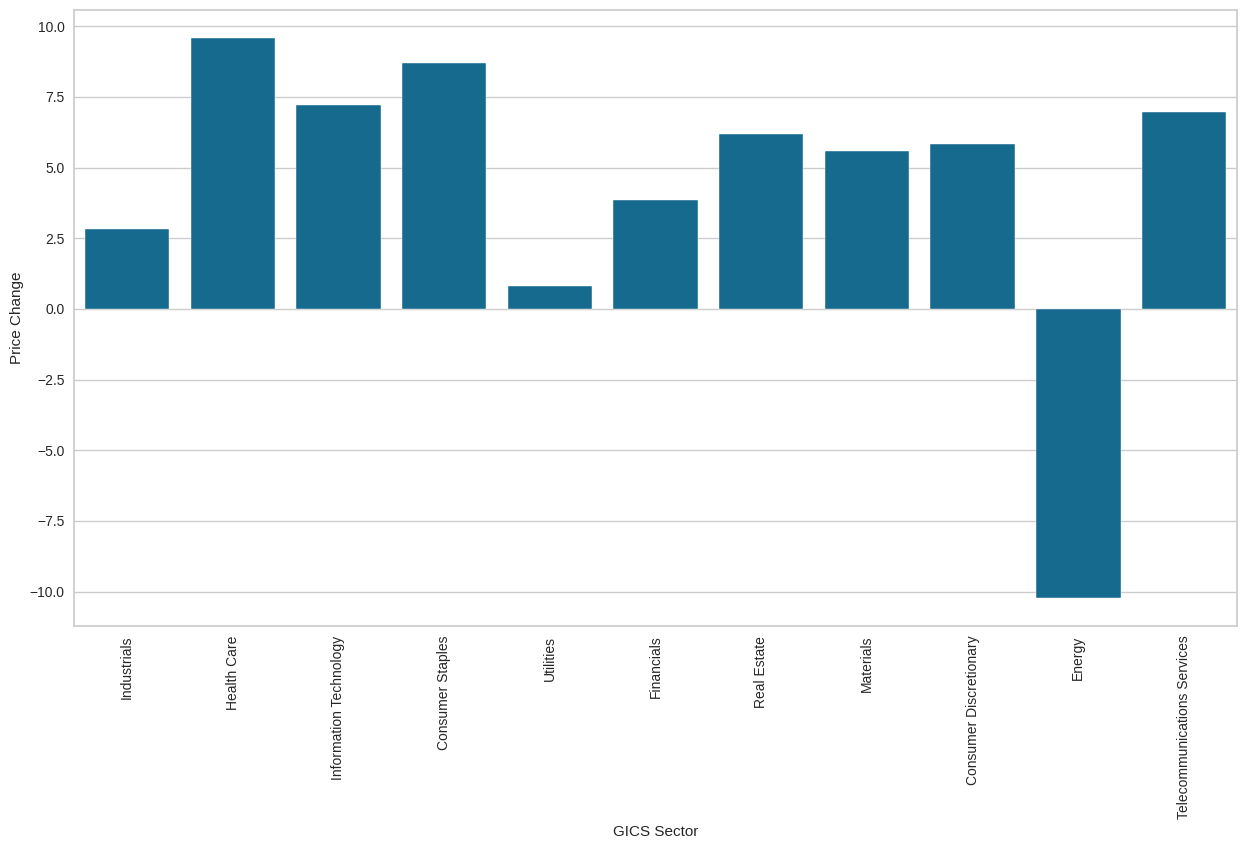

In [29]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)
plt.xticks(rotation=90)
plt.show()

Observation


- **From the bar chart provided, it is clear that the Health Care sector has seen the maximum price increase on average, with a price change close to 10%.**

- This suggests a shift in market trends favoring tech, health care, and consumer-oriented sectors while energy faces downward pressure.

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

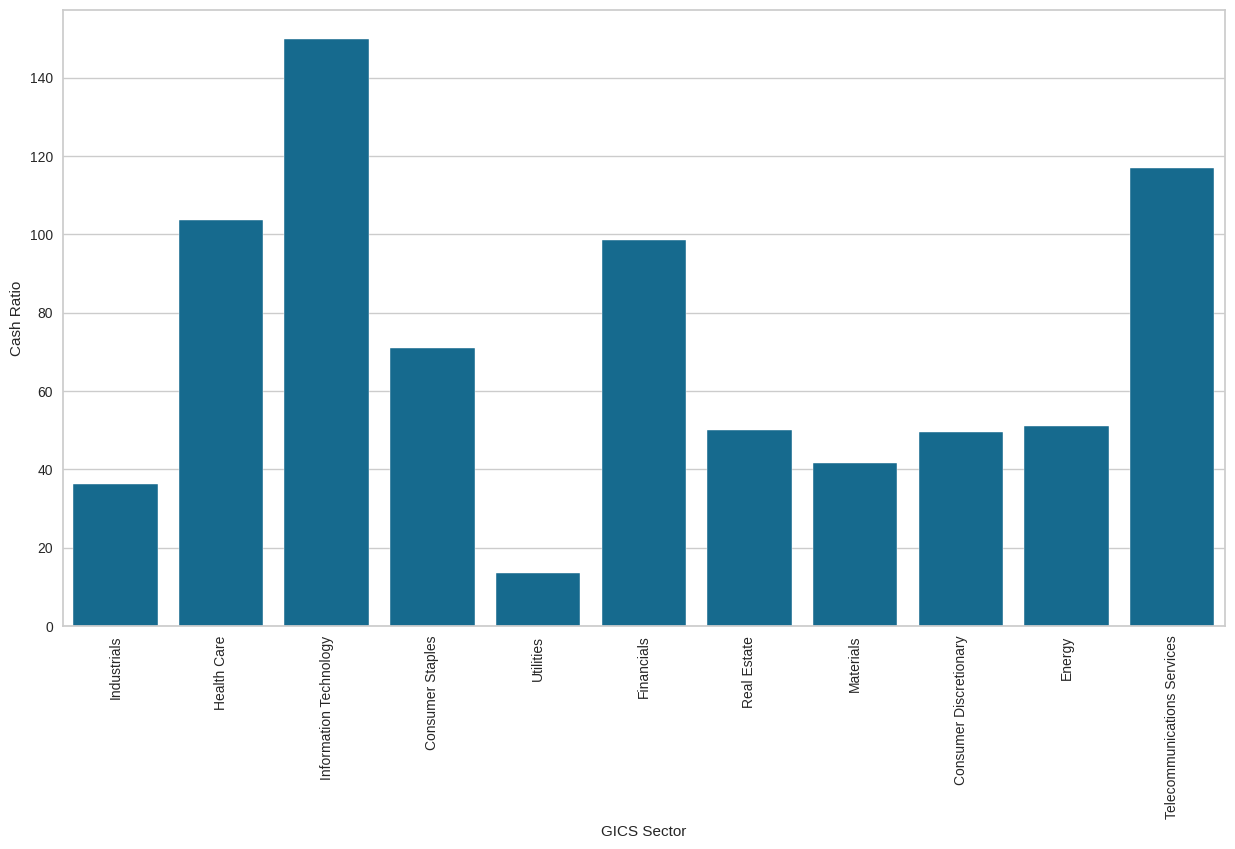

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

Observation

- The chart shows that Information Technology, Health Care, and Telecommunication Services have the highest average cash ratios, reflecting strong liquidity.

- Utilities have the lowest cash ratio, likely due to heavy infrastructure investments. Other sectors, like Industrials, Energy, and Consumer Discretionary, maintain moderate cash ratios, balancing liquidity with operational needs.

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

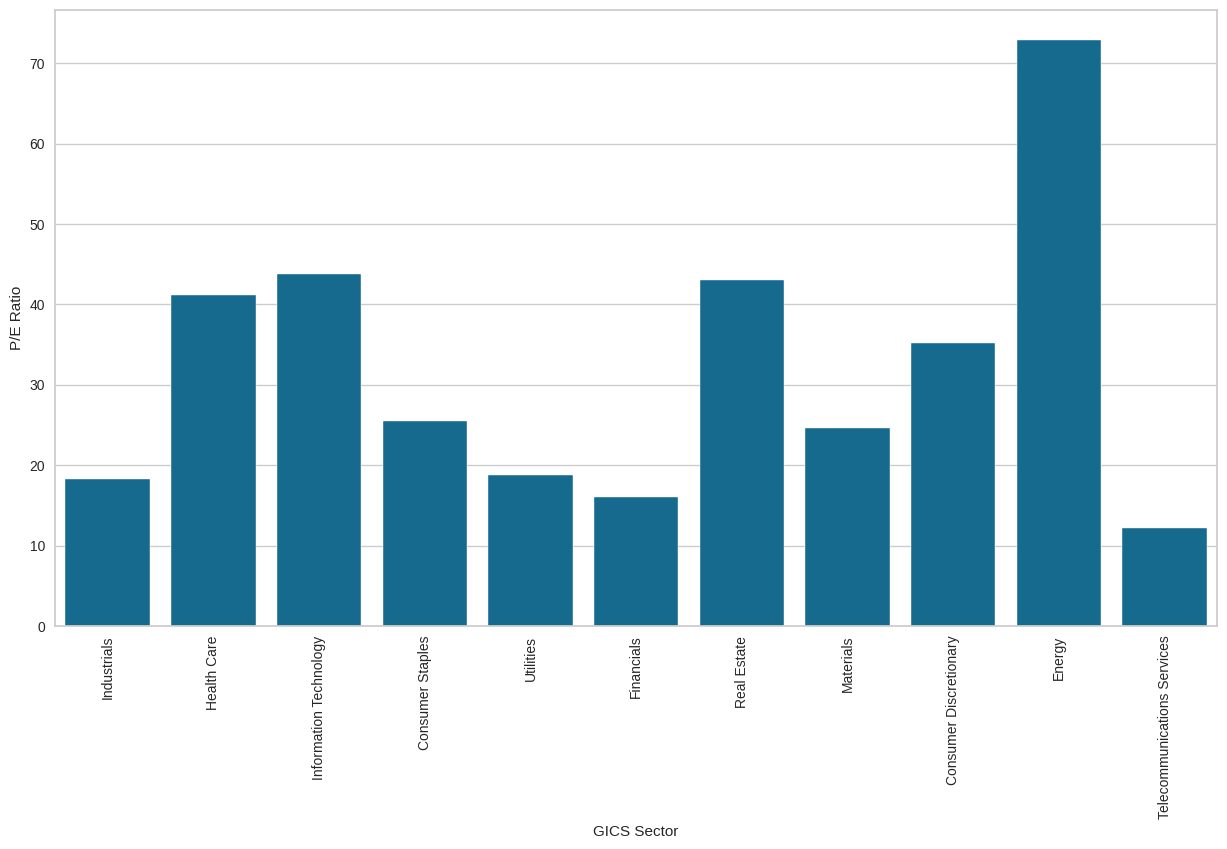

In [31]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

Observation

- The chart shows that Energy, Health Care, and Information Technology have the highest P/E ratios, indicating strong growth expectations.

- Utilities, Financials, and Telecommunication Services have lower P/E ratios, suggesting stability or lower growth prospects.

- Other sectors fall in the moderate range, balancing growth and stability.

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

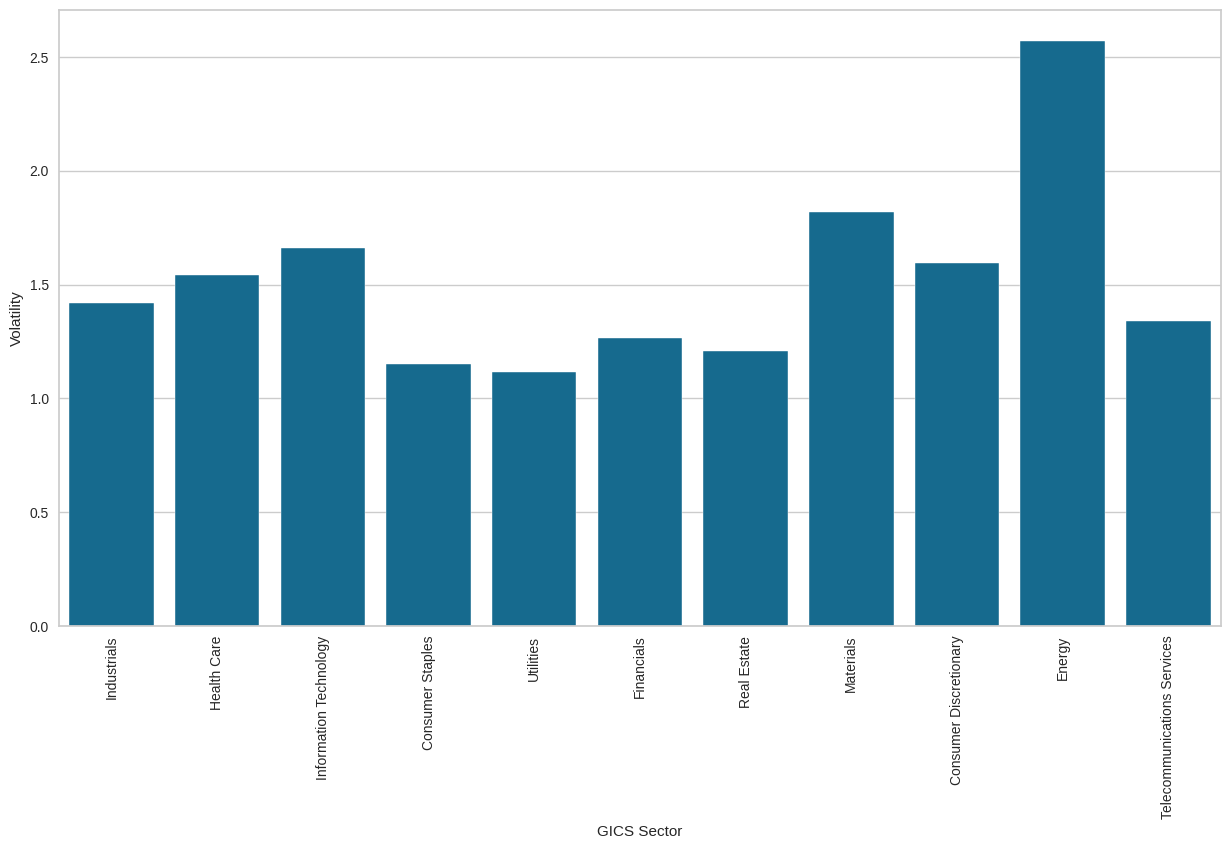

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)
plt.xticks(rotation=90)
plt.show()

Observation

- The chart shows that Energy and Consumer Discretionary have the highest volatility, indicating greater investment risk.

- Utilities and Consumer Staples have the lowest volatility, reflecting stability.

- Other sectors, like Health Care, Information Technology, and Industrials, exhibit moderate volatility, balancing risk and stability.

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

### Outlier Check

- Let's plot the boxplots of all numerical columns to check for outliers.

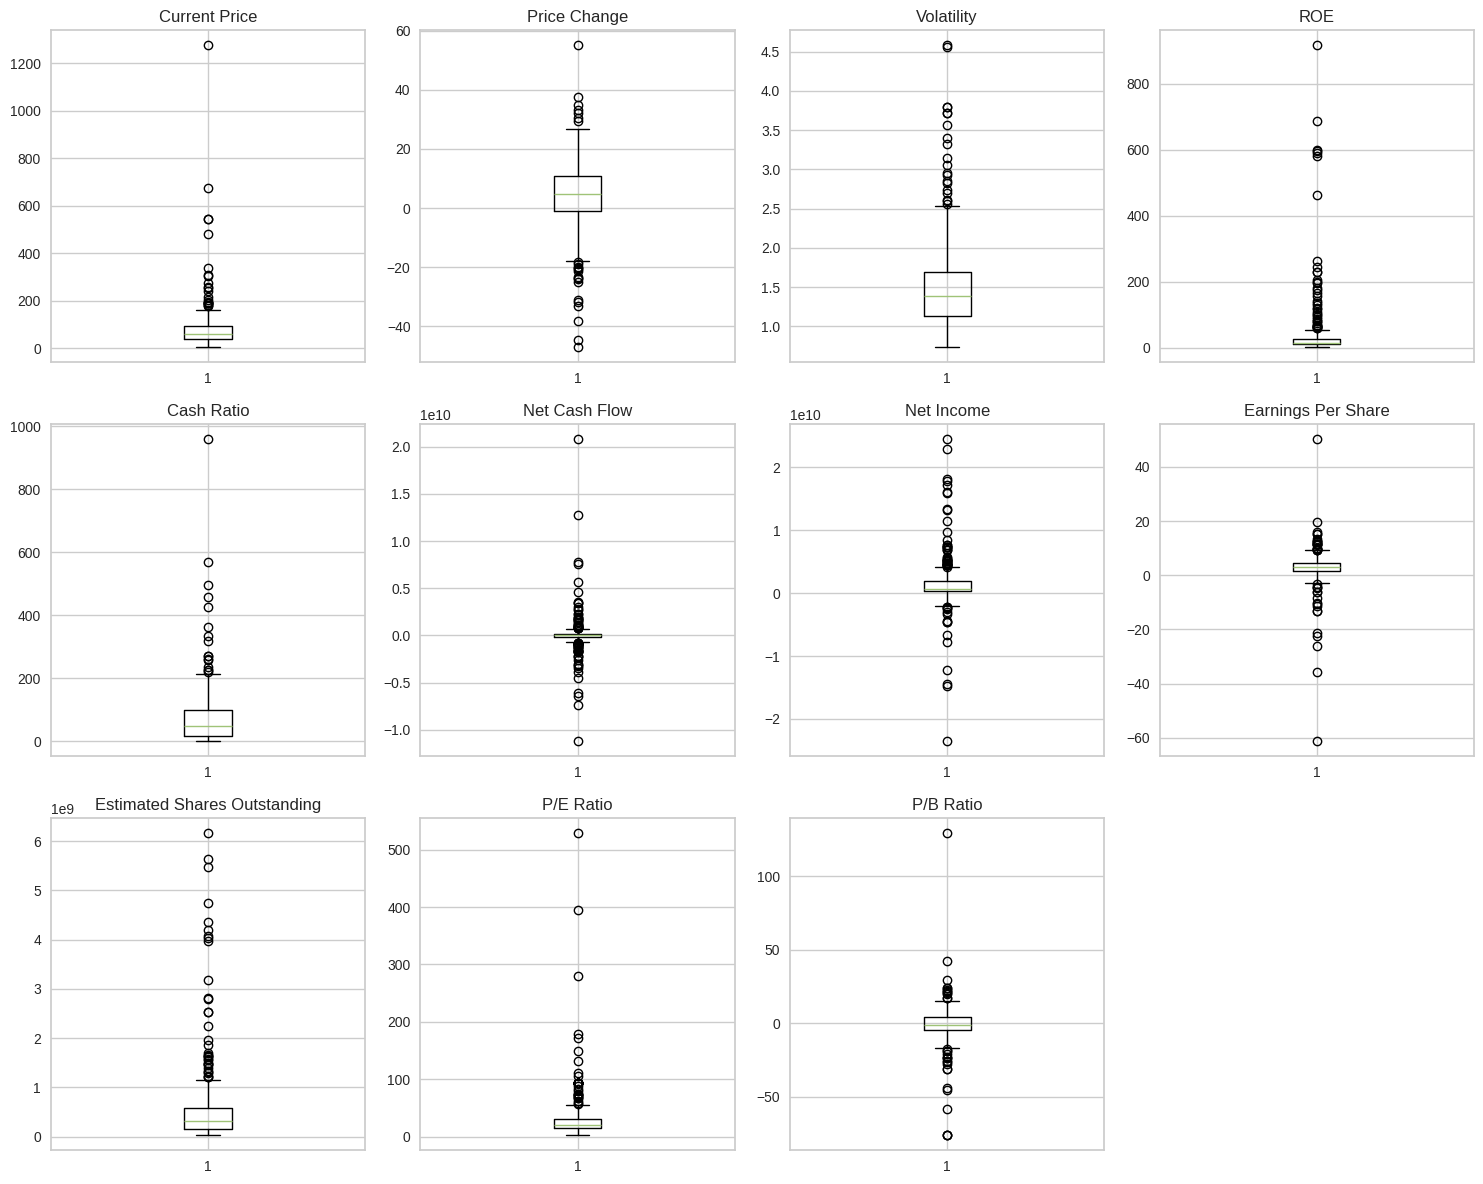

In [33]:
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

Observation

- There are quite are outliers in the dataset.
- However, we will not treat them as they are proper values.

### Scaling

- Let's scale the data before we proceed with clustering.

In [34]:
# scaling the data before clustering
scaler = StandardScaler()
subset = df[['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow',
            'Net Income', 'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio']]
subset_scaled = scaler.fit_transform(subset)

In [35]:
from re import sub
# creating a dataframe of the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


Observation

- The standardized dataset reflects diverse company performance, with variations in financial health, profitability, liquidity, and valuation.

- Positive deviations in metrics like ROE, EPS, and P/E ratio highlight strong performers, while negative values in areas such as net income and cash flow indicate underperformers, showcasing a mix of high-growth, stable, and struggling companies.

## EDA

- It is a good idea to explore the data once again after manipulating it.

### Bivariate Analysis

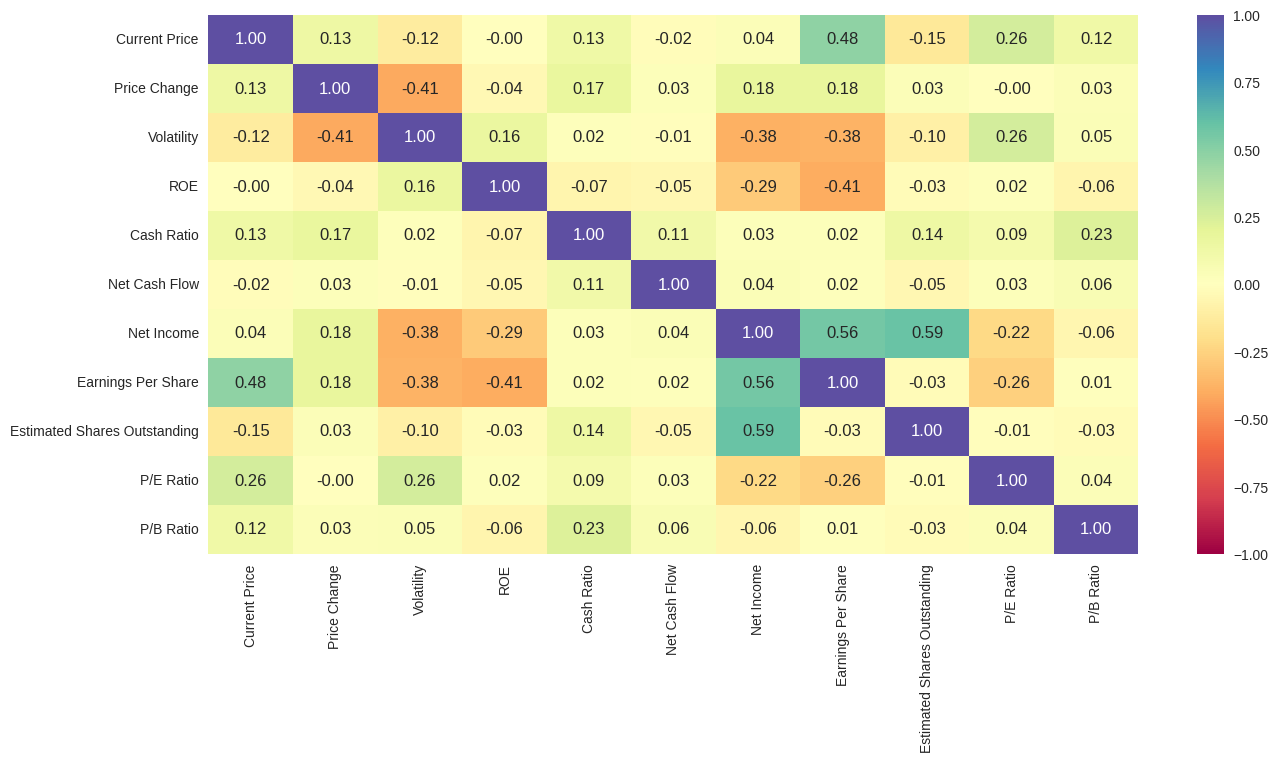

In [36]:
# correlation check
plt.figure(figsize=(15, 7))
num_df = df.select_dtypes(include=np.number) # Selecting only numerical columns for correlation calculation
sns.heatmap(
    num_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Observation

After data manipulation, the heatmap shows a positive correlation between stock price and earnings per share, a negative impact of volatility on price stability and earnings, a strong link between net income and EPS, and a positive association between outstanding shares and net income.

**Let's check the stocks of which economic sector have seen the maximum price increase on average.**

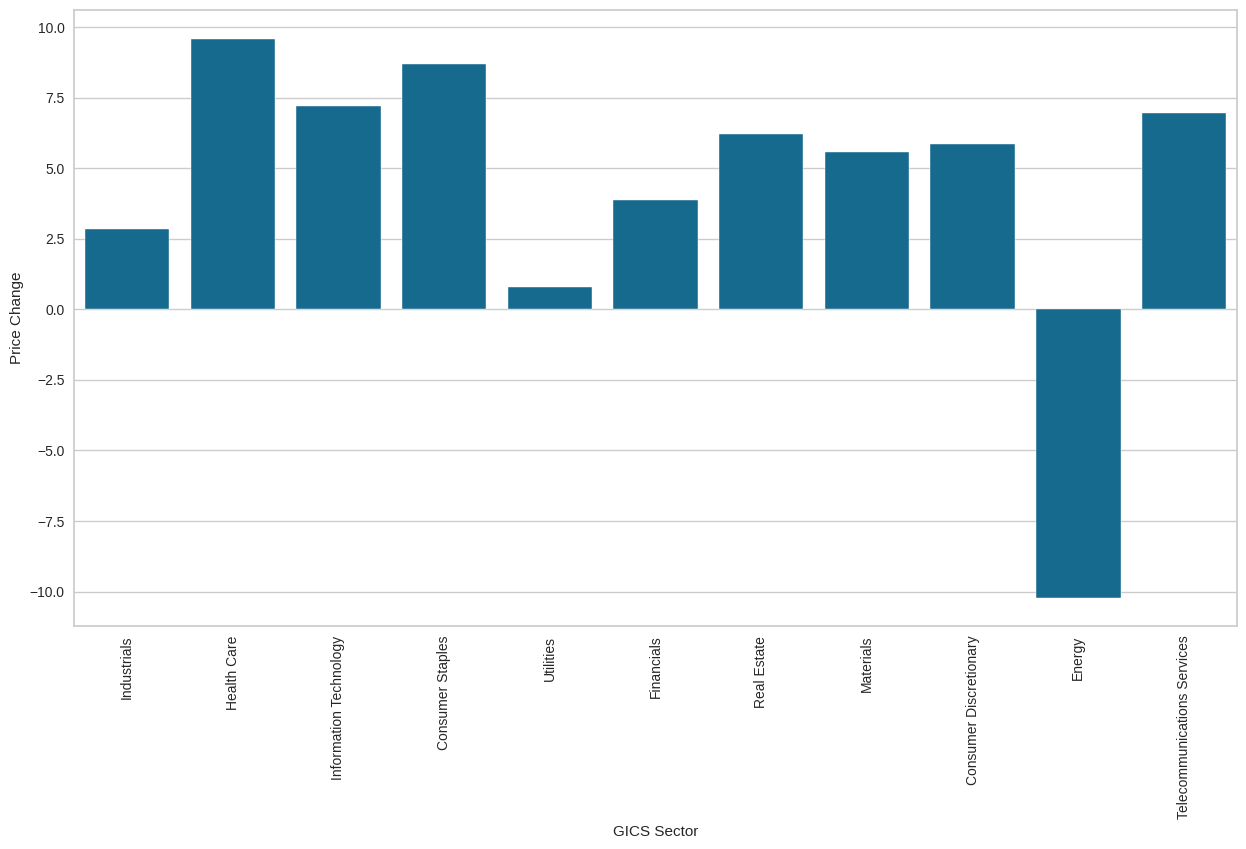

In [37]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)
plt.xticks(rotation=90)
plt.show()

Observation

After data manipulation, the bar chart indicates that most GICS sectors saw positive price changes, led by Health Care and Information Technology, while the Energy sector experienced a notable decline.

**Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. Let's see how the average cash ratio varies across economic sectors.**

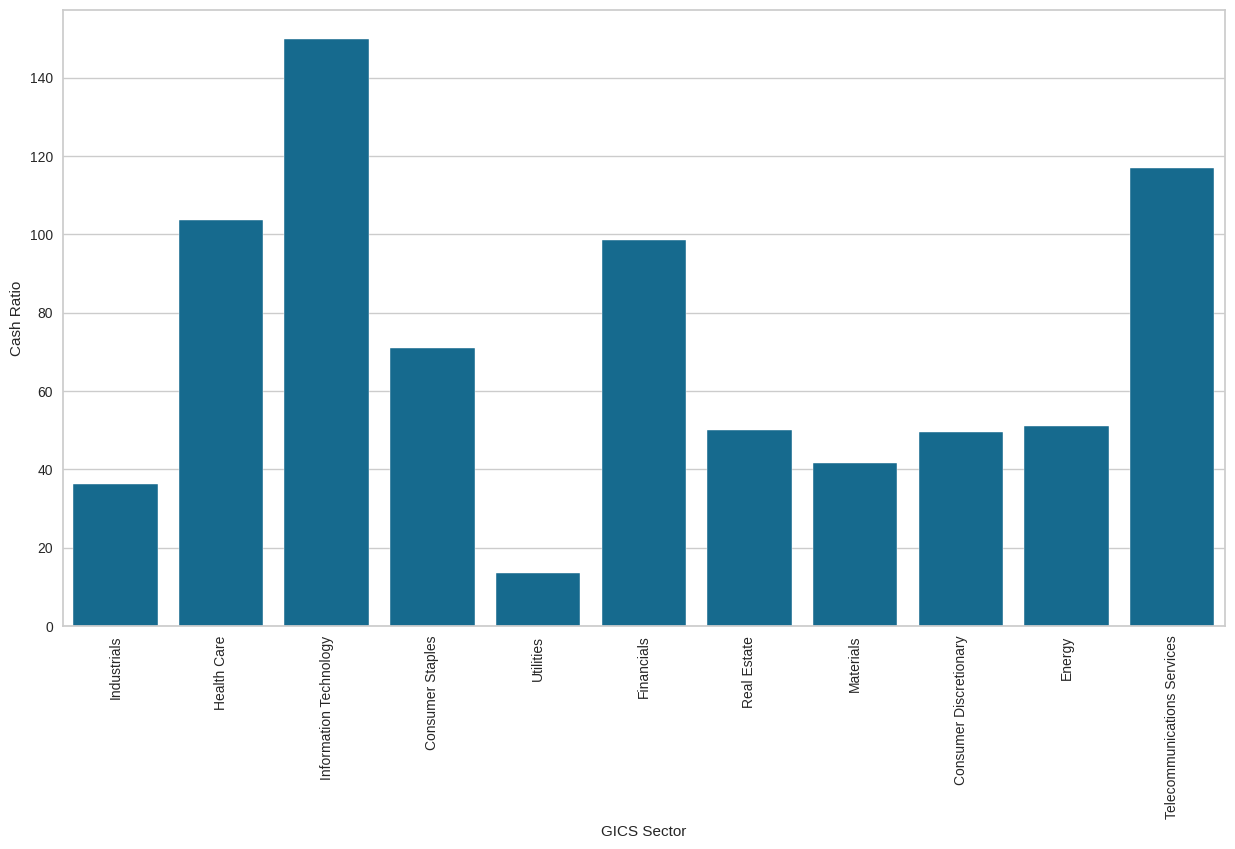

In [38]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

Observation

After data manipulation, the bar chart reveals that Information Technology and Telecommunications Services maintain the highest cash ratios, whereas Utilities exhibit the lowest among the GICS sectors.

**P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. Let's see how the P/E ratio varies, on average, across economic sectors.**

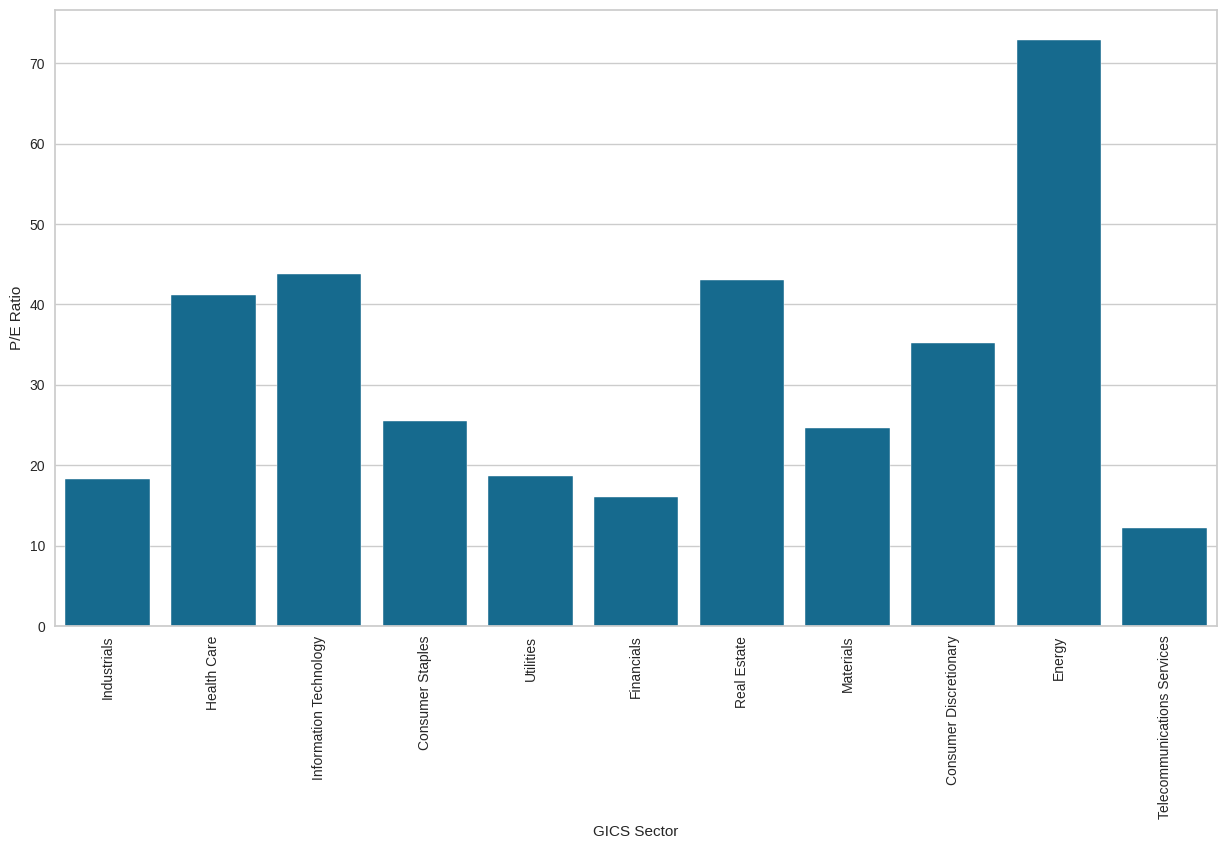

In [39]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

Observation

After data manipulation, the bar chart illustrates the P/E (Price-to-Earnings) ratios across various GICS sectors, highlighting the Energy sector with the highest P/E ratio, surpassing 70, while Telecommunications Services has the lowest, falling below 15.

**Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. Let's see how volatility varies, on average, across economic sectors.**

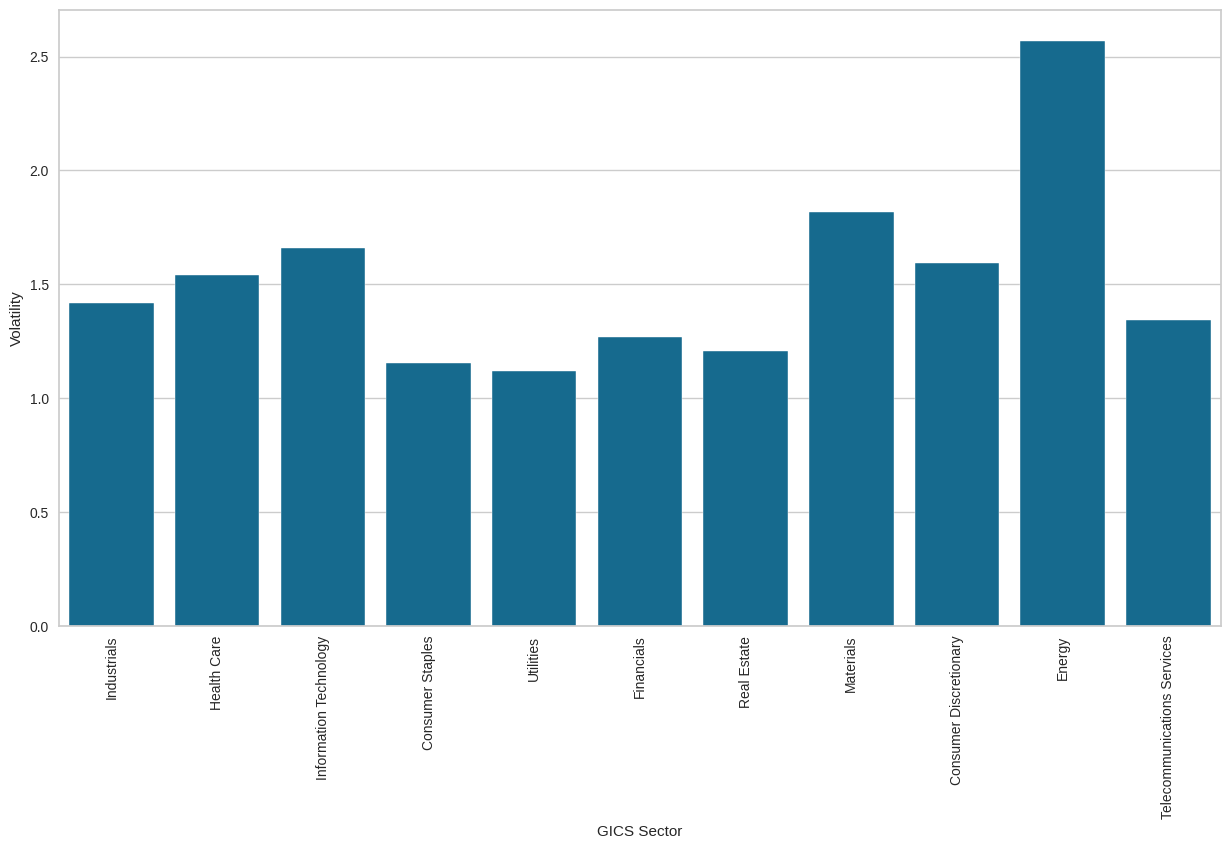

In [40]:
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)
plt.xticks(rotation=90)
plt.show()

Observation

Following data manipulation, the bar chart depicts the volatility across different GICS sectors, with the Energy sector having the highest volatility, exceeding 2.5, while Consumer Staples and Utilities have the lowest, just above 1.0.

## K-means Clustering

### Checking Elbow Plot

In [41]:
k_means_df = subset_scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.3862098789299604
Number of Clusters: 3 	Average Distortion: 2.33620927590848
Number of Clusters: 4 	Average Distortion: 2.219050563833442
Number of Clusters: 5 	Average Distortion: 2.133404401901685
Number of Clusters: 6 	Average Distortion: 2.081503686093715
Number of Clusters: 7 	Average Distortion: 2.0045413402786814
Number of Clusters: 8 	Average Distortion: 1.9864237824874411


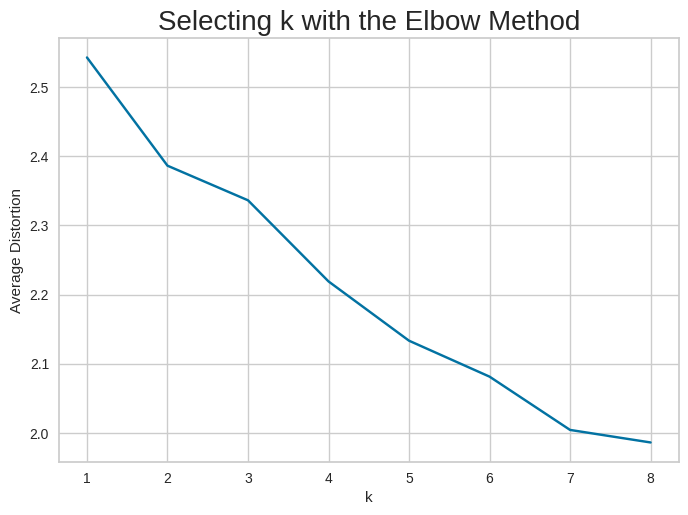

In [42]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

Observation

- The elbow point in the plot occurs at around 3 or 4 clusters, where the rate of decrease in average distortion slows down significantly. This suggests that 3 or 4 clusters may be an optimal choice for segmentation.

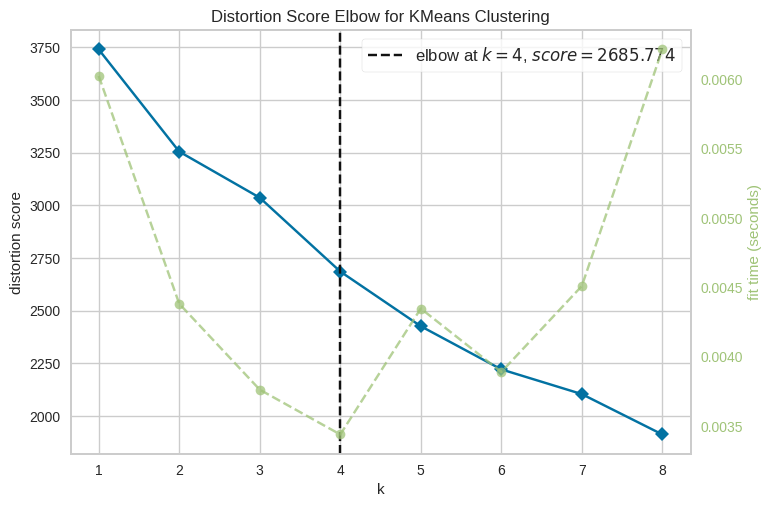

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 9), timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

### Let's check the silhouette scores

For n_clusters = 2, the silhouette score is 0.45335782729503565)
For n_clusters = 3, the silhouette score is 0.40374060030338865)
For n_clusters = 4, the silhouette score is 0.4246430808437099)
For n_clusters = 5, the silhouette score is 0.4381539778147092)
For n_clusters = 6, the silhouette score is 0.40869599703024256)
For n_clusters = 7, the silhouette score is 0.1207450219233897)
For n_clusters = 8, the silhouette score is 0.3693991650696542)


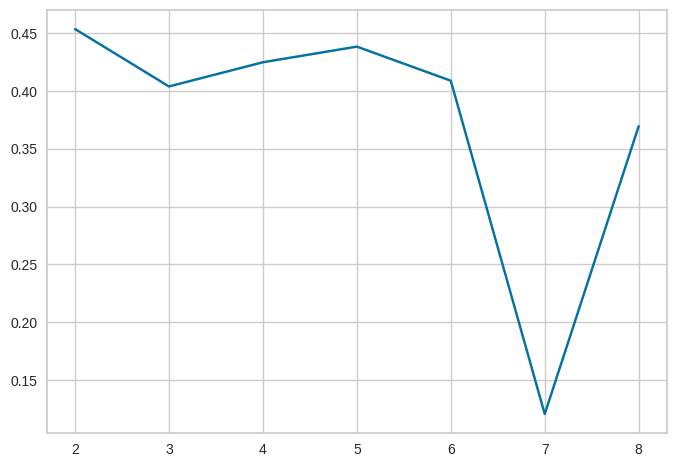

In [44]:
sil_score = []
cluster_list = range(2, 9)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

Observation

- The highest silhouette score is at n_clusters = 2 (0.4534), indicating the best cluster separation. Scores remain stable for n_clusters = 3 to 6, while a significant drop at n_clusters = 7 (0.1207) suggests poor clustering.

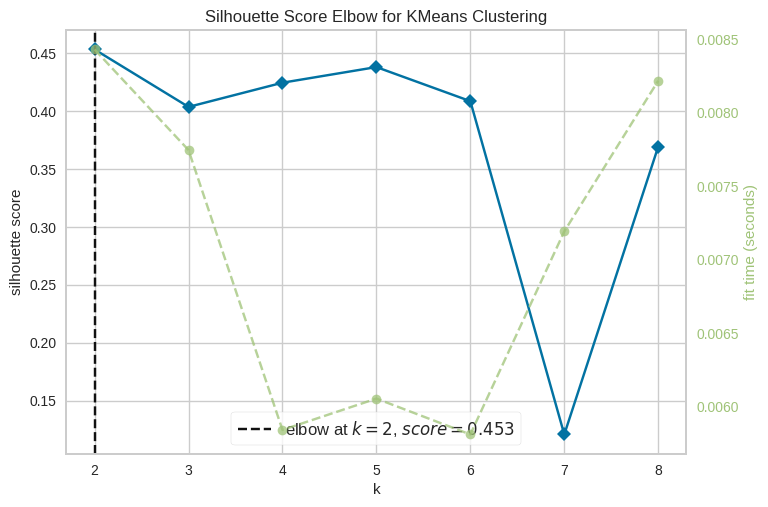

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [45]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 9), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

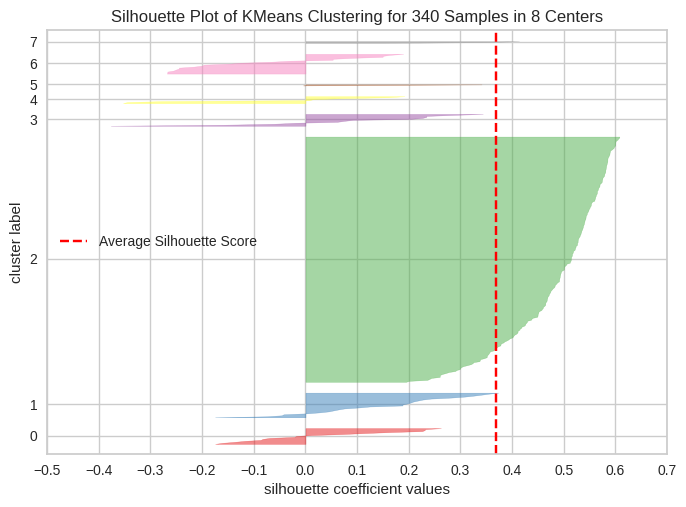

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [46]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(n_clusters=8, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

Observation

- The silhouette plot evaluates an 8-cluster KMeans model for 340 samples. The average silhouette score (red dashed line) suggests moderate clustering quality.

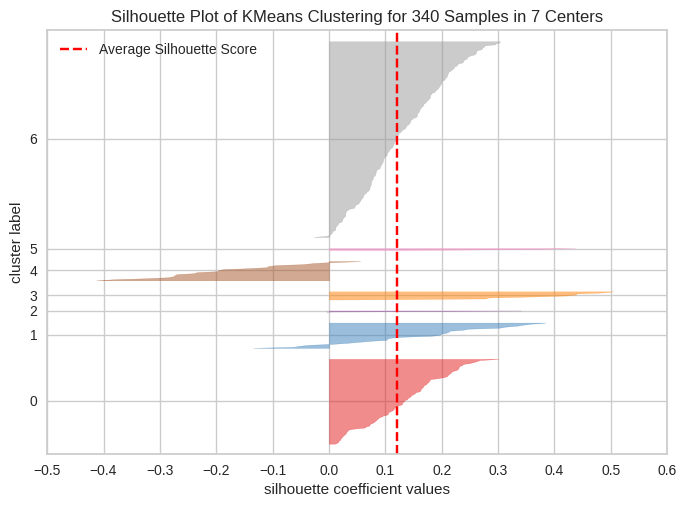

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [47]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(n_clusters=7, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

Observation

- The clustering structure is suboptimal, with many points poorly clustered (negative or near-zero silhouette scores).

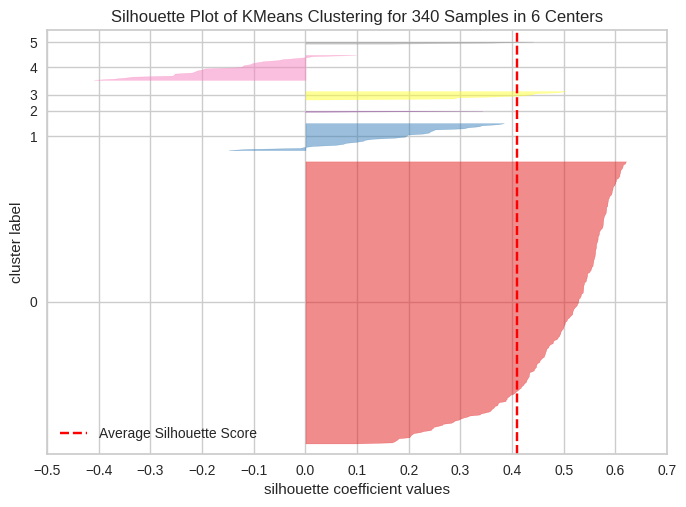

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [48]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(n_clusters=6, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

Observation

- The silhouette plot for 6 clusters shows moderate clustering quality (average score ~0.4), with improved separability for smaller clusters but some overlap and poor assignments.

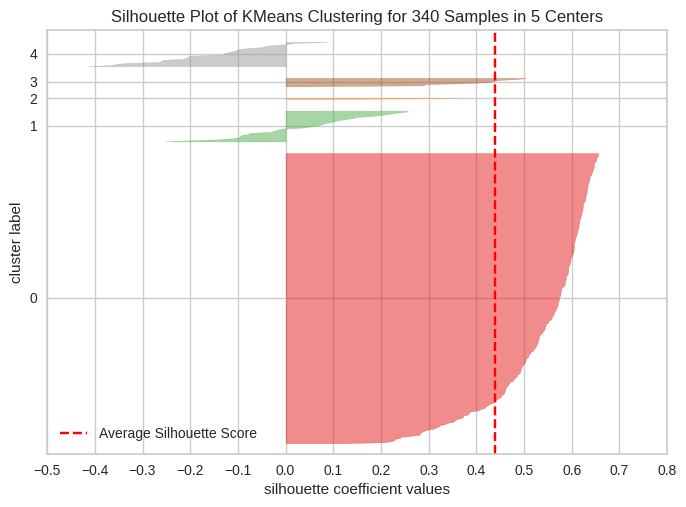

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [49]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(n_clusters=5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

Observation

- The silhouette plot for 5 clusters shows moderate clustering quality (average score ~0.4), with some dominance by a large cluster and a few poorly assigned samples.

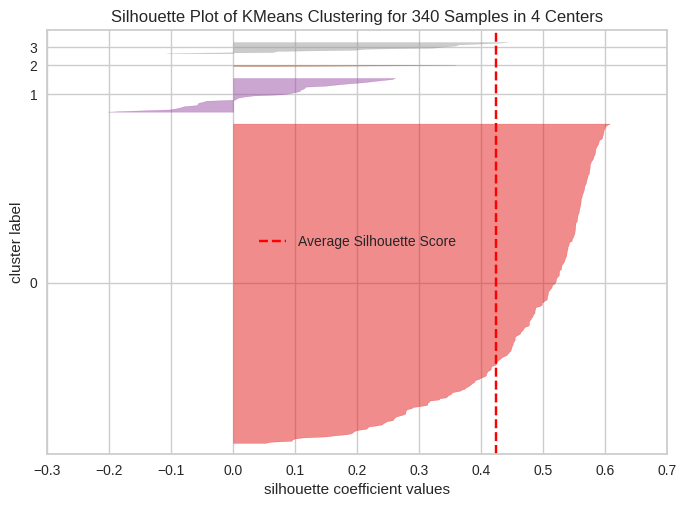

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [50]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(n_clusters=4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

Observation

- The silhouette plot for 4 clusters shows moderate quality (average ~0.4), with some overlaps and a cluster having negative scores.

### Creating Final Model


Let's take 6 as the appropriate no. of clusters as the silhouette score is high enough and there is knick at 6 in the elbow curve.

In [51]:
# final K-means model
kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(k_means_df)

KMeans(n_clusters=6, random_state=1)

In [52]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

### Cluster Profiling

In [53]:
km_cluster_profile = df1.groupby("KM_segments").agg({col: 'mean' for col in df1.select_dtypes(include=np.number).columns})

In [54]:
km_cluster_profile["count_in_each_segment"] = (
    df1.groupby("KM_segments")["Security"].count().values
)

In [55]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,KM_segments,count_in_each_segment
KM_segments,,,,,,,,,,,,,
0,72.976734,5.192788,1.376317,34.941606,53.197080,-10337605.839416,1495249751.824817,3.650566,435769103.743102,23.699140,-3.417280,0.000000,274
1,34.231808,-15.515565,2.832069,48.037037,47.740741,-128651518.518519,-2444318518.518518,-6.284444,503031539.057037,75.627265,1.655990,1.000000,27
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2.000000,2
3,46.672222,5.166566,1.079367,25.000000,58.333333,-3040666666.666667,14848444444.444445,3.435556,4564959946.222222,15.596051,-6.354193,3.000000,9
4,204.930931,11.885400,1.699460,30.040000,279.920000,2121806560.000000,2724131680.000000,6.558000,799318866.712800,43.517668,15.097707,4.000000,25
5,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,5.000000,3


In [56]:
## Complete the code to print the companies in each cluster
for cl in df1["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle Internationa

In [57]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          5
             Financials                     45
             Health Care                    29
             Industrials                    51
             Information Technology         24
             Materials                      18
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
1            Energy                         21
             Industrials                     2
             Information Technology          2
             Materials                       2
2            Energy                          2
3            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     1
             Telecommunications Services     2
4            Consumer Discretionary          5
             Consumer Staples                1
             Energy                          1
             Financials                      1
             Health Care                     9
             Information Technology          6
             Real Estate                     1
             Telecommunications Services     1
5            Consumer Discretionary          1
             Health Care                     1
             Information Technology          1
Name: Security, dtype: int64

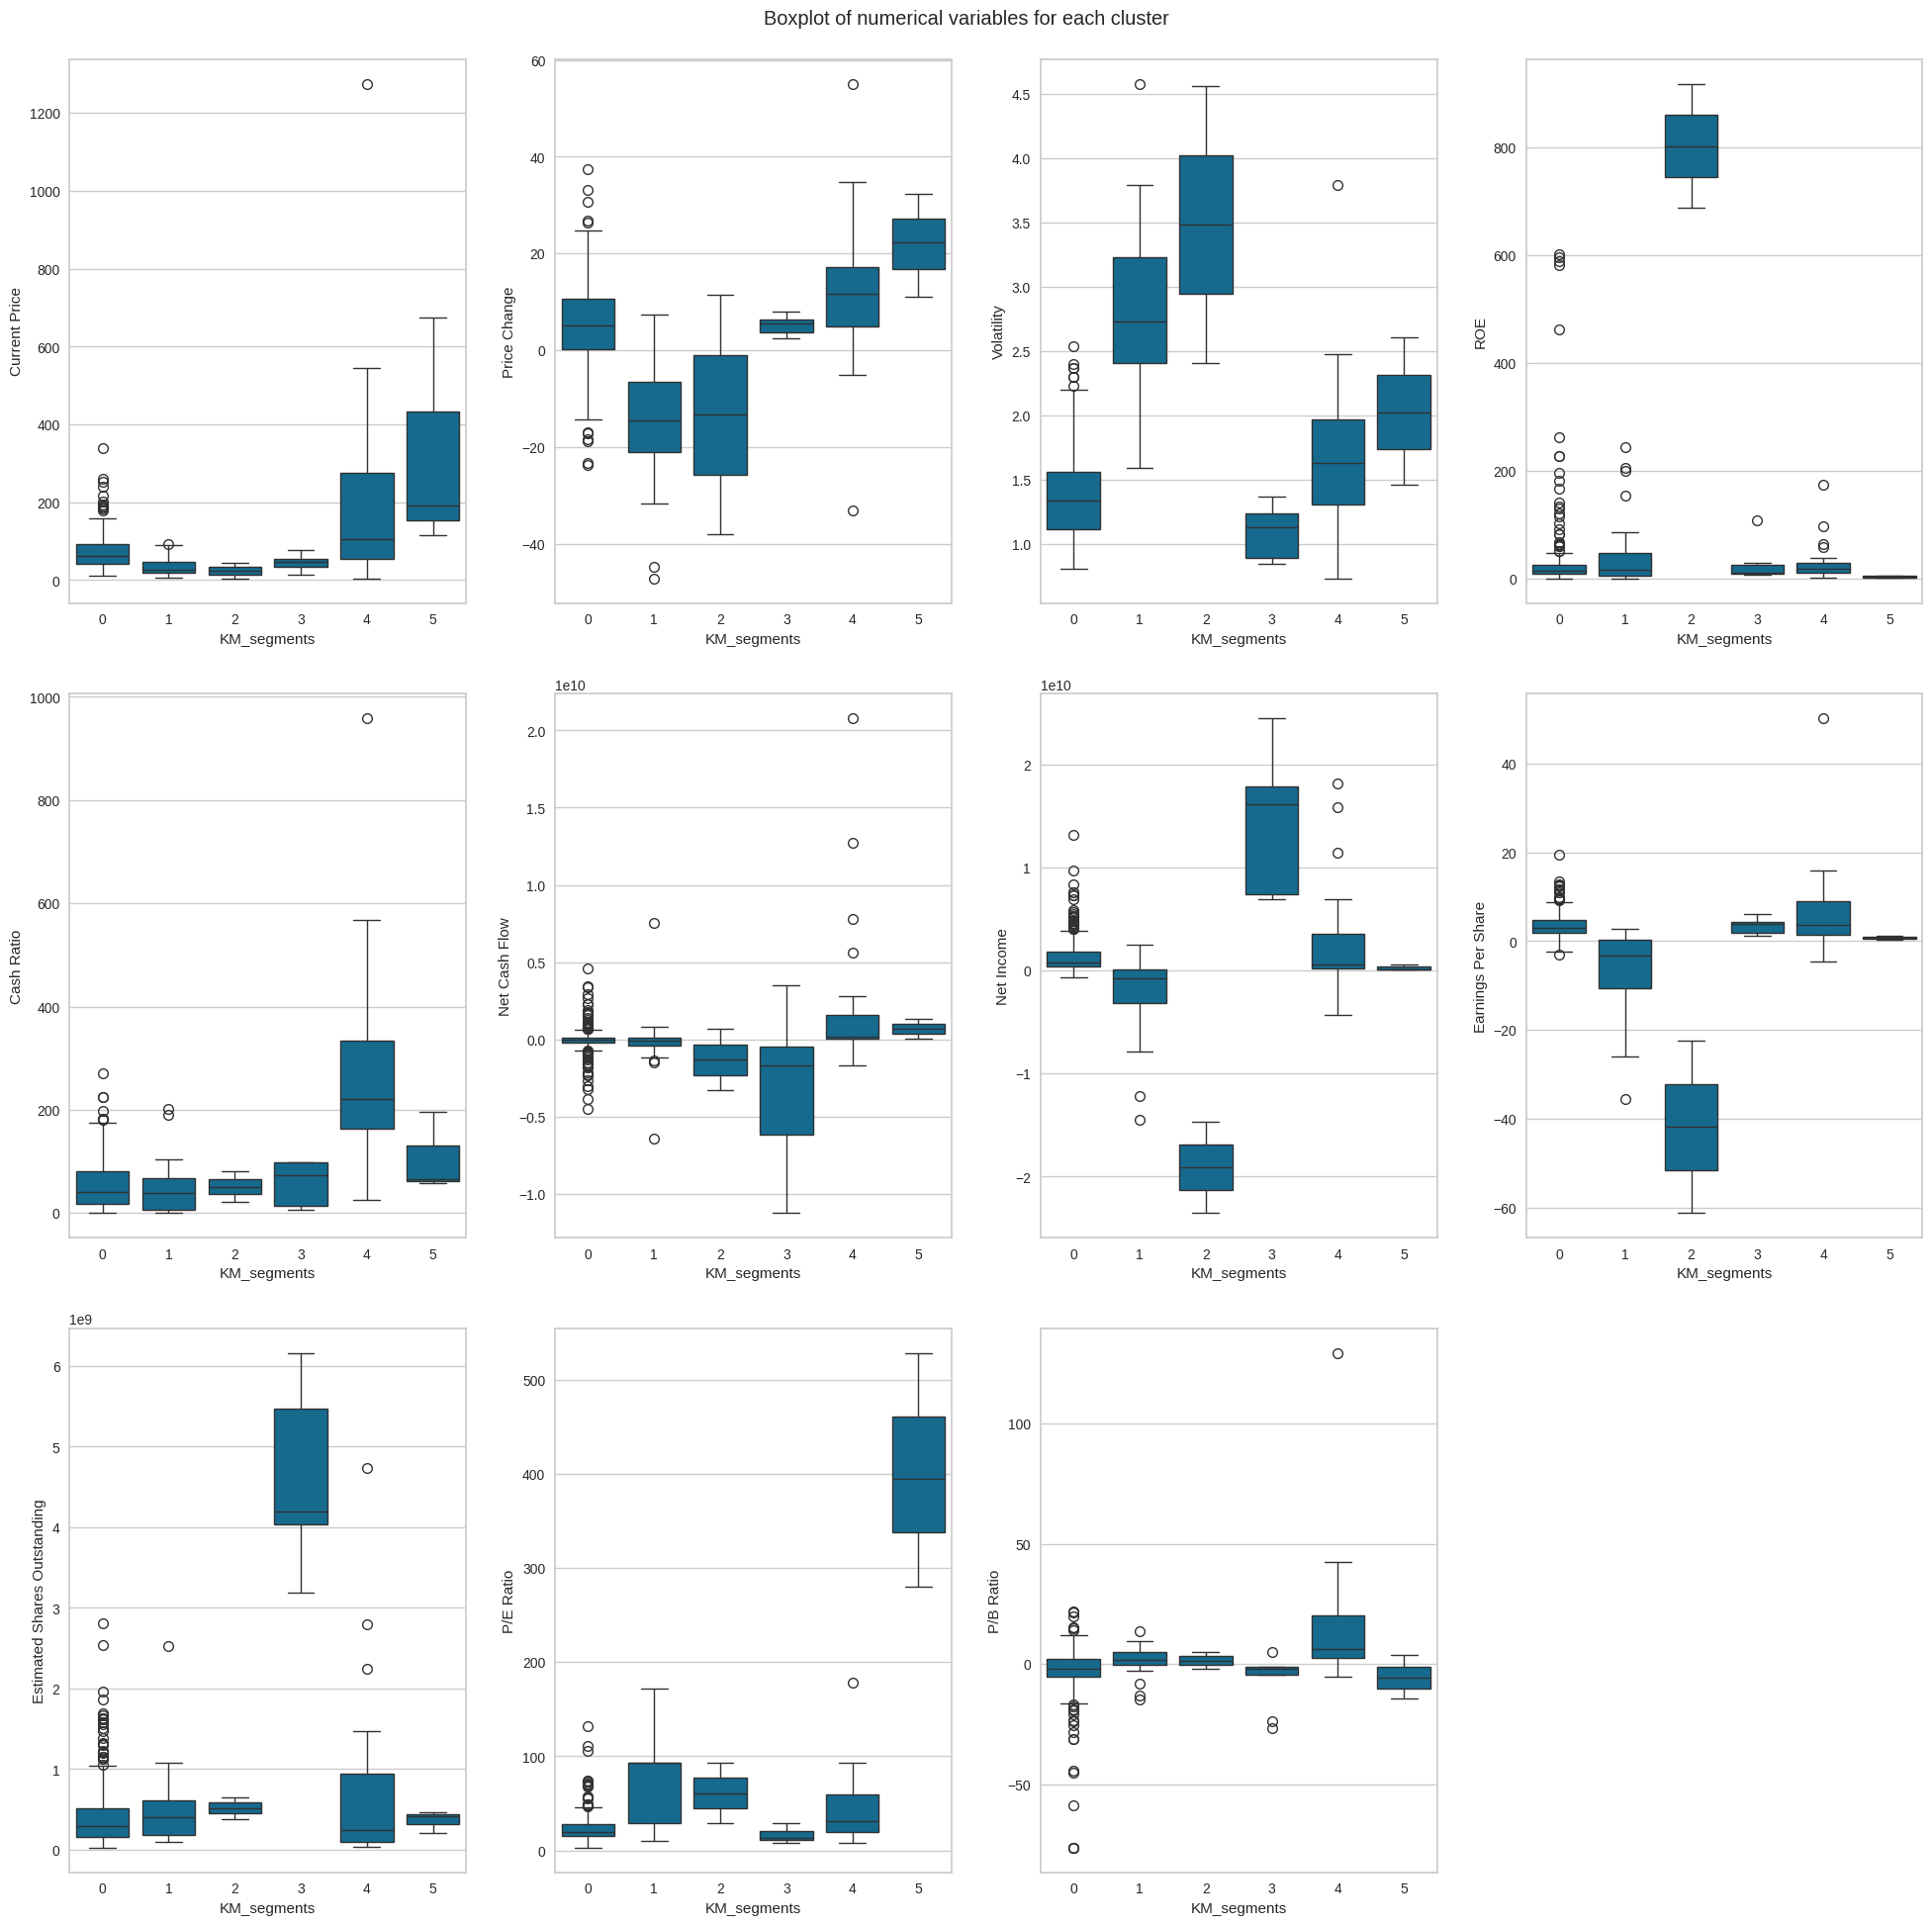

In [58]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

- **Cluster 0:**
  - A diverse set of industries, spanning finance, tech, healthcare, and manufacturing.
  - Stable and moderate-growth companies.

  
- **Cluster 1:**
  - Oil and gas industry-focused companies.
  - Underperforming and volatile companies.

  
- **Cluster 2:**

    - Traditional energy extraction companies.
    - Extreme outliers with significant financial distress.


- **Cluster 3:**
  - Well-established finance and consumer goods companies.
  - Strong profitability but cash flow challenges.

- **Cluster 4:**
  - Technology and healthcare innovation-focused companies.
  - High-performing companies with excellent liquidity.


- **Cluster 5:**
  - High-growth and tech-driven companies.
  - Premium stocks with high valuation, possibly speculative.



## Hierarchical Clustering

### Computing Cophenetic Correlation

In [59]:
hc_df = subset_scaled_df.copy()

In [60]:
# list of distance metrics
distance_metrics = ['euclidean', 'cityblock', 'cosine','chebyshev', 'mahalanobis']

# list of linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        # Only use 'ward' with 'euclidean' distance
        if lm == 'ward' and dm != 'euclidean':
            continue  # Skip this combination

        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and ward linkage is 0.7101180299865353.
Cophenetic correlation for Cityblock distance and single linkage is 0.9334186366528574.
Cophenetic correlation for Cityblock distance and complete linkage is 0.7375328863205818.
Cophenetic correlation for Cityblock distance and average linkage is 0.9302145048594667.
Cophenetic correlation for Cosine distance and single linkage is 0.1633637841831045.
Cophenetic correlation for Cosine distance and complete linkage is 0.14558585821013348.
Cophenetic correlation for Cosine distance and average linkage is 0.27565476401031014.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Cheby

**Let's explore different linkage methods with Euclidean distance only.**

In [61]:
# list of linkage methods

linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.
****************************************************************************************************
Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


Observation

- The highest cophenetic correlation of 0.942 with average linkage indicates it best preserves the pairwise distances and provides the most coherent clustering for the dataset.

- This suggests that the structure of the data is more naturally aligned with the method of averaging the distances between clusters rather than single or complete linkage.

**Let's view the dendrograms for the different linkage methods with Euclidean distance.**

### Checking Dendrograms

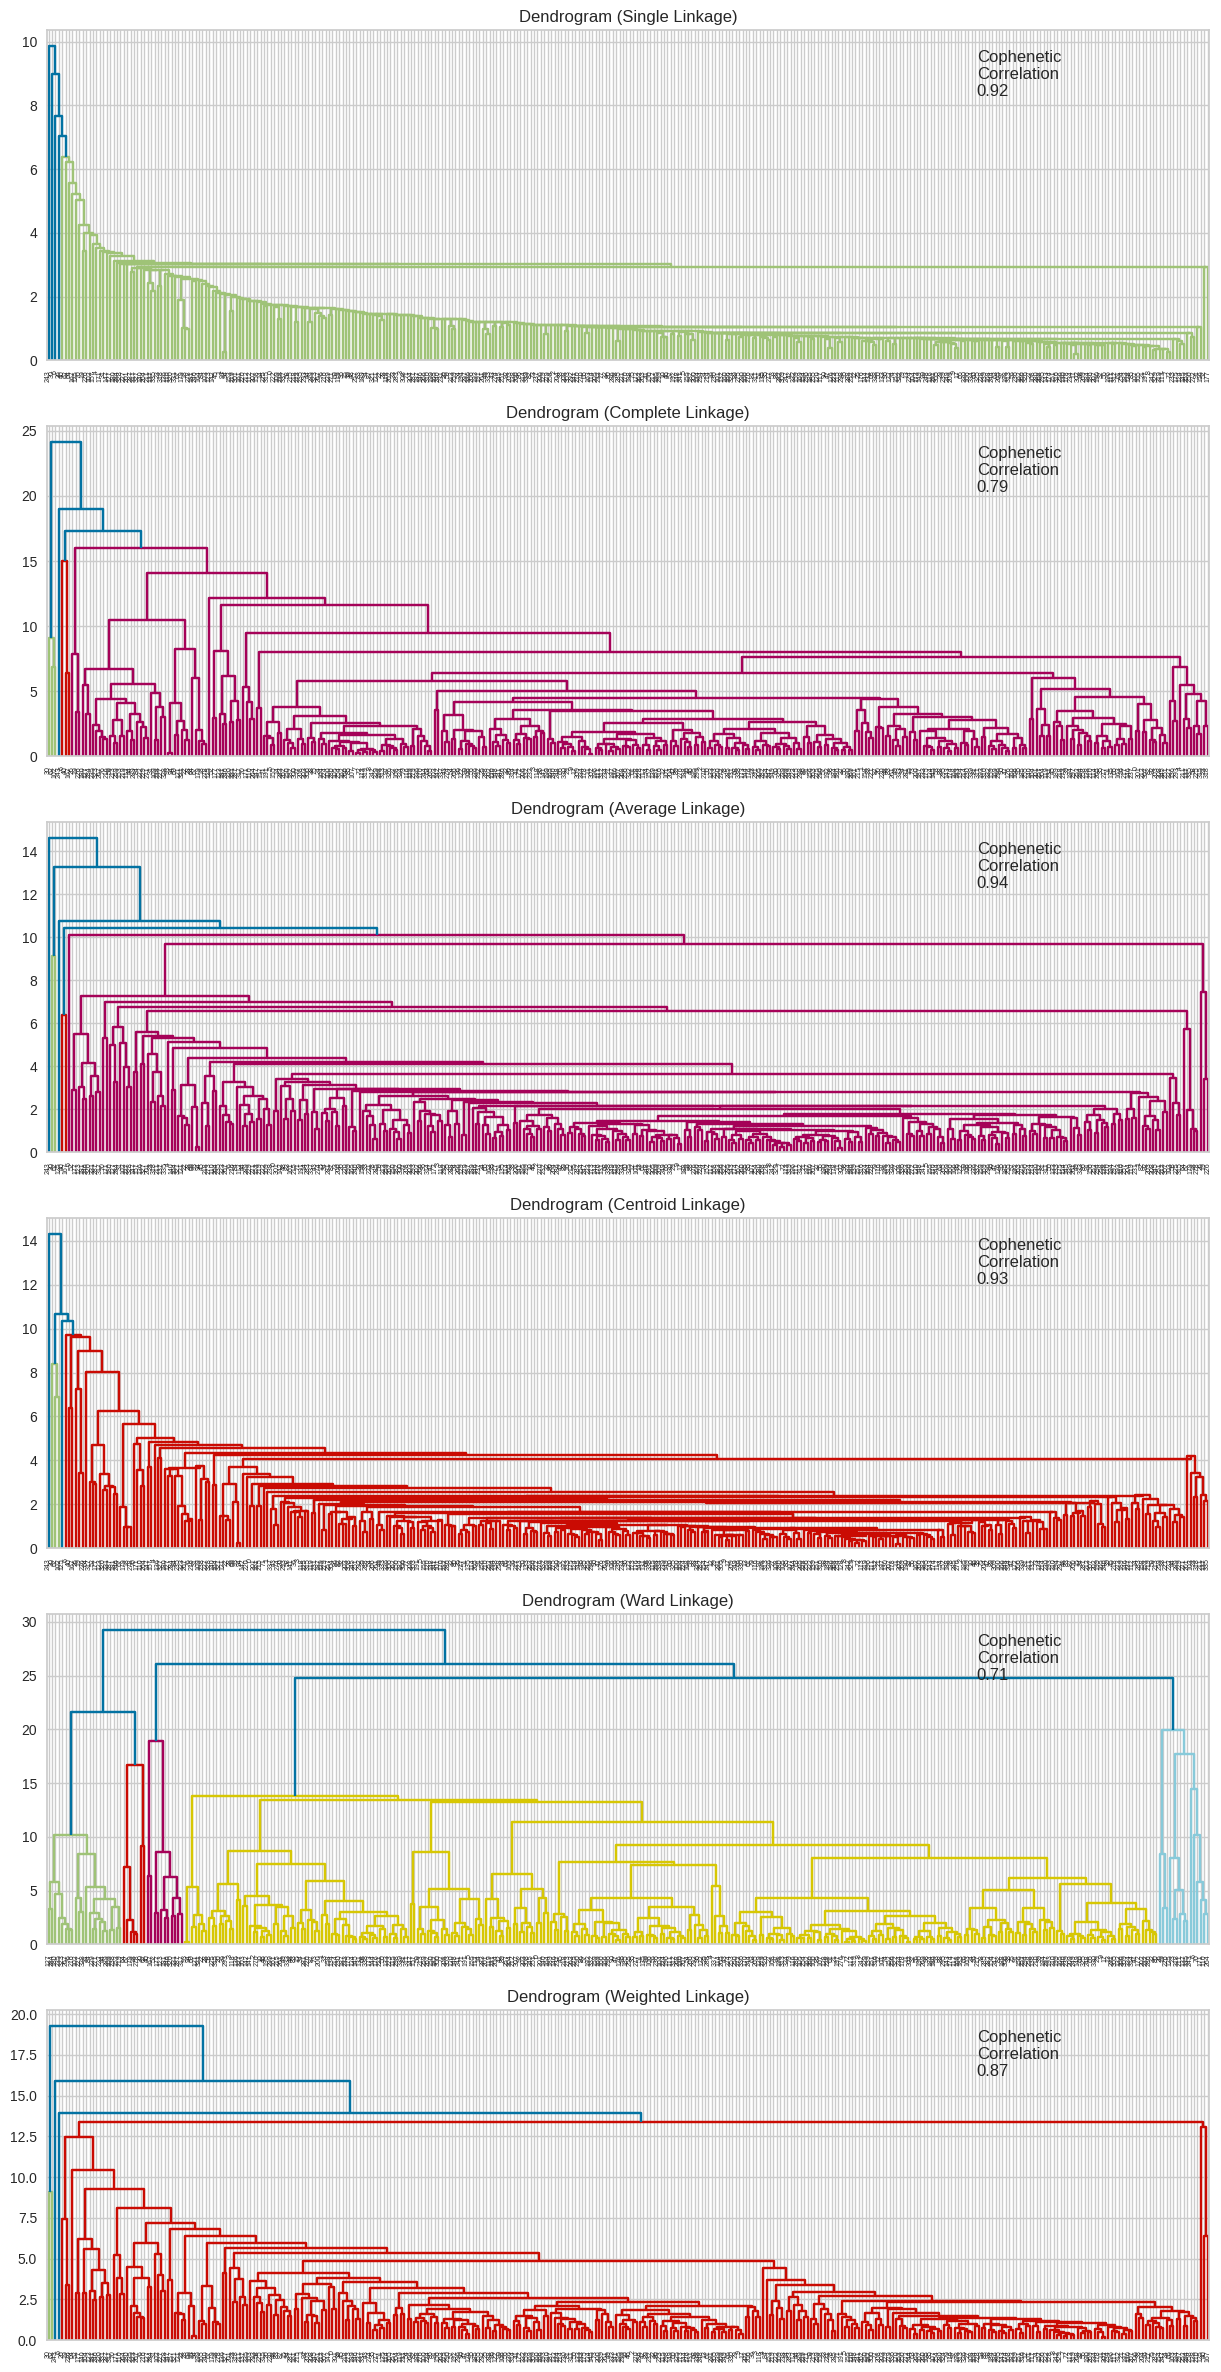

In [62]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

In [63]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
4,ward,0.710118
1,complete,0.787328
5,weighted,0.869378
0,single,0.923227
3,centroid,0.931401
2,average,0.942254


Observation

- Average Linkage is the best method based on the highest cophenetic correlation coefficient (0.94).

- It provides consistent and well-separated clusters, effectively preserving the data's structure.

- 6 appears to be the appropriate number of clusters from the dendrogram for average linkage.

### Creating model using sklearn

#### **Average Linkage**

In [64]:
HCmodel = AgglomerativeClustering(n_clusters=6, linkage='average')  ## Removed affinity parameter as it's not needed for average linkage
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [65]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [66]:
hc_cluster_profile = df2.groupby("HC_segments").agg({col: 'mean' for col in df2.select_dtypes(include=np.number).columns})


In [67]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

In [68]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,HC_segments,count_in_each_segment
HC_segments,,,,,,,,,,,,,
0,77.287589,4.099730,1.518066,35.336336,66.900901,-33197321.321321,1538074666.666667,2.885270,560505037.293544,32.441706,-2.174921,0.000000,333
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,1.000000,2
2,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2.000000,2
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,3.000000,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,4.000000,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,5.000000,1


In [69]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.'
 'Aon plc' 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball 

Obseravation

- The data suggests that the larger clusters, particularly Cluster 0, exhibit relatively stable financial health, while the smaller clusters (Segments 2, 3, 4, and 5) display significant variability in their financial outcomes.

- This clustering may not be ideal, as the segments lack sufficient diversity and distinct differentiation, making it challenging to identify meaningful patterns or trends across the groups.

#### **Complete Linkage**

In [70]:
HCmodel = AgglomerativeClustering(n_clusters=4, linkage="complete") # Removed affinity parameter as it's not needed for ward linkage
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [71]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [72]:
hc_cluster_profile = df2.groupby("HC_segments").agg({col: 'mean' for col in df2.select_dtypes(include=np.number).columns})

In [73]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

In [74]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,HC_segments,count_in_each_segment
HC_segments,,,,,,,,,,,,,
0,77.505788,4.194932,1.513252,34.744745,69.567568,-33912036.036036,1592498090.090090,2.995961,567694770.268018,32.402078,-2.162612,0.000000,333
1,109.283336,9.555034,1.253895,18.333333,95.333333,11200628333.333334,9301513666.666666,5.166667,1883536858.683333,19.446599,44.027184,1.000000,3
2,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,2.000000,1
3,26.990000,-14.060688,3.296307,603.000000,57.333333,-585000000.000000,-17555666666.666668,-39.726667,481910081.666667,71.528835,1.638633,3.000000,3


In [75]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.'
 'Aon plc' 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball 

Observation

- The clustering indicates uneven distribution, with most companies concentrated in Cluster 0, while other clusters have very few companies, reducing variability and insightfulness.

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 5 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.**

## Creating Final Model

#### **Ward Linage**

In [76]:
HCmodel = AgglomerativeClustering(n_clusters=5, linkage="ward") # Removed affinity parameter as it's not needed for ward linkage
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=5)

In [77]:
# creating a copy of the original data
df2 = df.copy()

# adding hierarchical cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

### Cluster Profiling

In [78]:
hc_cluster_profile = df2.groupby("HC_segments").agg({col: 'mean' for col in df2.select_dtypes(include=np.number).columns})

In [79]:
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values
)

In [80]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,HC_segments,count_in_each_segment
HC_segments,,,,,,,,,,,,,
0,326.198218,10.563242,1.642560,14.400000,309.466667,288850666.666667,864498533.333333,7.785333,544900261.301333,113.095334,19.142151,0.000000,15
1,84.355716,3.854981,1.827670,633.571429,33.571429,-568400000.000000,-4968157142.857142,-10.841429,398169036.442857,42.284541,-11.589502,1.000000,7
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,2.000000,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,3.000000,285
4,36.440455,-16.073408,2.832884,57.500000,42.409091,-472834090.909091,-3161045227.272727,-8.005000,514367806.201818,85.555682,0.836839,4.000000,22


In [81]:
## Complete the code to print the companies in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 3, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Lim

Observation

- The Ward Linkage clustering analysis reinforces earlier findings, where smaller clusters show significant financial variability, while larger clusters dominate the dataset.

- Refining the clustering approach, such as rebalancing or incorporating additional features, could better reveal nuanced financial patterns across all segments.

In [82]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          3
             Consumer Staples                1
             Health Care                     5
             Information Technology          4
             Real Estate                     1
             Telecommunications Services     1
1            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
2            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      4
             Health Care                     1
             Information Technology          1
             Telecommunications Services     2
3            Consumer Discretionary         35
             Consumer Staples               15
             Energy                          7
             Financials                     44
             Health Care                    34
             Industrials                    52
             Information Technology         27
             Materials                      19
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
4            Energy                         20
             Information Technology          1
             Materials                       1
Name: Security, dtype: int64

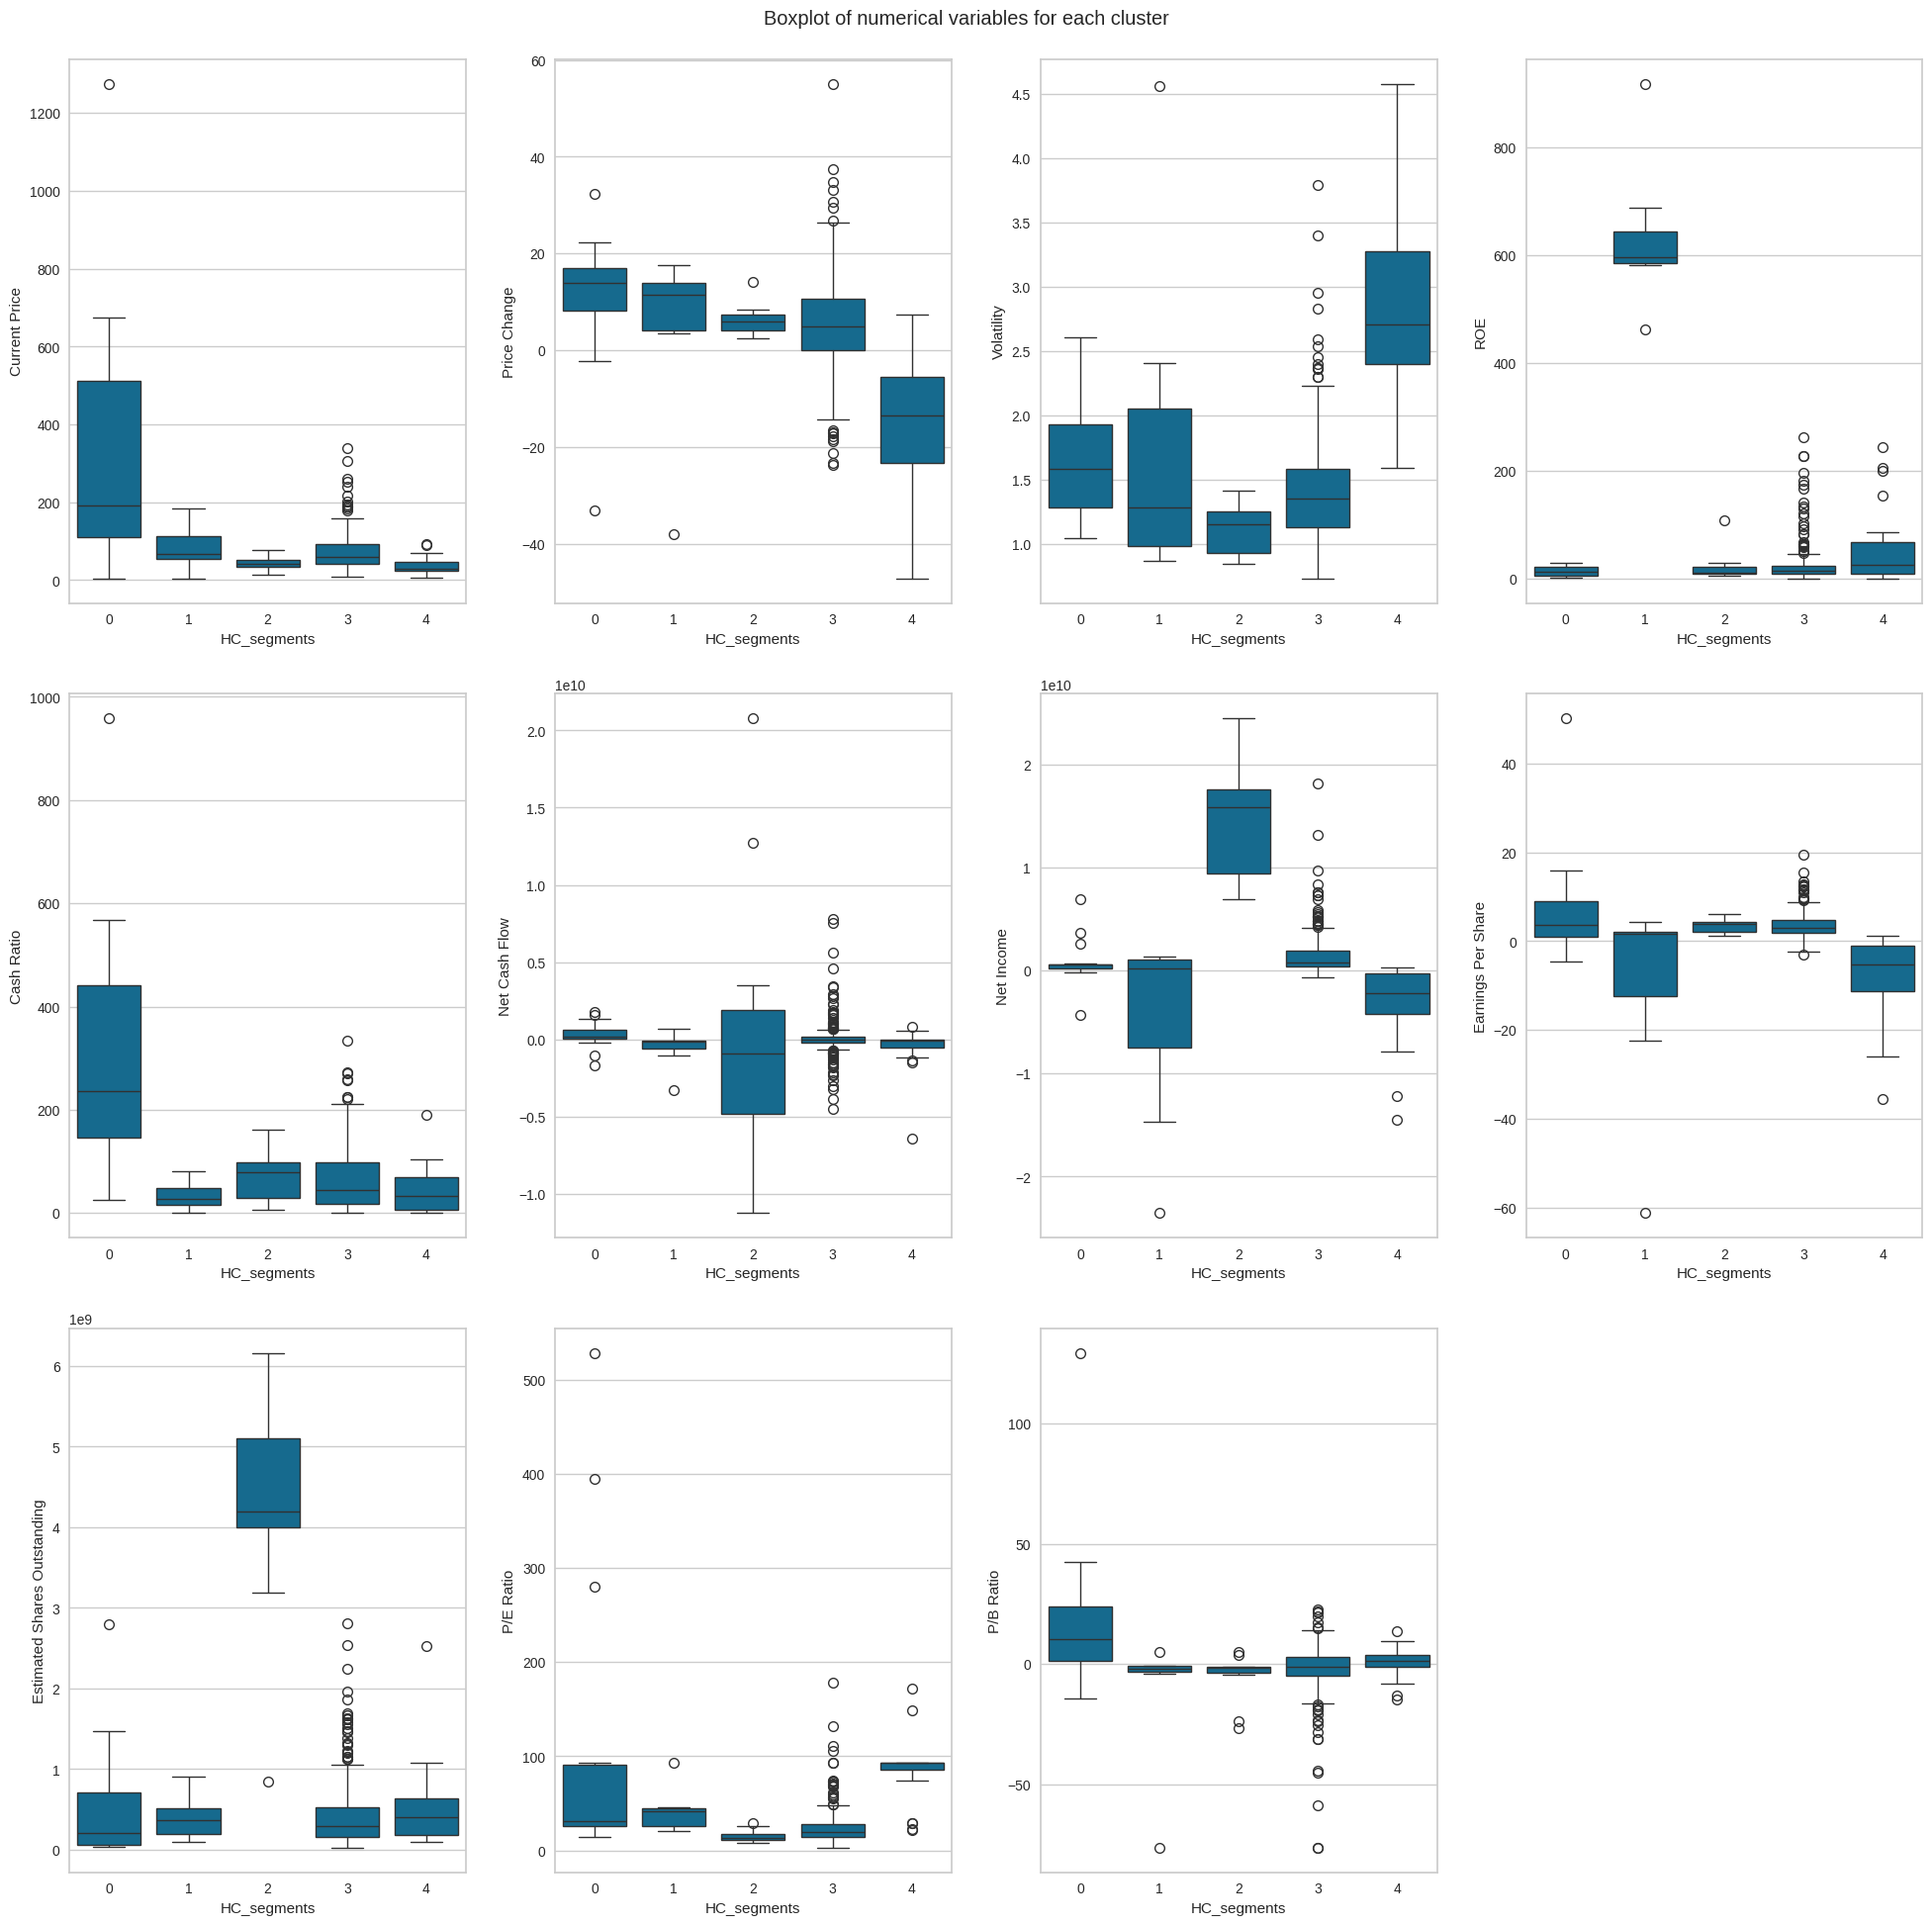

In [83]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

#### **Insight**

**Cluster 0:**
  - Contains 15 entities with high current prices and moderate volatility.
  - ROE and cash ratios are solid, with positive net cash flow and earnings, indicating good financial health.

**Cluster 1:**
  - Includes 7 entities with moderate prices and the highest ROE.
  - However, the cluster shows negative net income and cash flow, reflecting financial instability.

**Cluster 2:**
  - Comprises 11 entities with moderate prices and low volatility.
  - ROE and cash ratios are strong, supported by significant net income and positive cash flow, suggesting financial stability.

**Cluster 3:**
  - The largest segment with 285 entities, characterized by low prices and moderate ROE.
  - It exhibits steady net income but lower earnings per share, indicating an average financial position.

**Cluster 4:**
  - Consists of a smaller group of entities (not counted), with the lowest prices and high volatility.
  - This cluster shows negative net income and earnings, reflecting poor financial performance.



## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

### **Which clustering technique took less time for execution?**

In [84]:
%%time
# Your K-means clustering code here
kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(k_means_df)

CPU times: user 9.34 ms, sys: 0 ns, total: 9.34 ms
Wall time: 10.5 ms


KMeans(n_clusters=6, random_state=1)

In [85]:
%%time
# Your hierarchical clustering code here
HCmodel = AgglomerativeClustering(n_clusters=5, linkage='ward')
HCmodel.fit(hc_df)

CPU times: user 8.08 ms, sys: 720 µs, total: 8.8 ms
Wall time: 10.1 ms


AgglomerativeClustering(n_clusters=5)

Based on the provided execution times:

- KMeans took a total of 12 ms (Wall time).
- AgglomerativeClustering took a total of 8.16 ms (Wall time).
- Thus, AgglomerativeClustering executed faster than KMeans.

### **Which clustering technique gave you more distinct clusters, or are they the same?**

In [86]:
from sklearn.metrics.cluster import contingency_matrix

contingency_table = contingency_matrix(df1['KM_segments'], df2['HC_segments'])
print(contingency_table)

[[  0   5   0 269   0]
 [  0   0   0   5  22]
 [  0   2   0   0   0]
 [  0   0   9   0   0]
 [ 12   0   2  11   0]
 [  3   0   0   0   0]]



**Distinctness:**
  - While both methods provided some level of cluster distinction, **Ward linkage with 5 clusters in Hierarchical Clustering appears to have produced more distinct and separated clusters compared to K-means with 6 clusters.**
  - This is due to Ward linkage's tendency to create more balanced and well-defined clusters.


**Cluster Similarity:**

  - Although the clusters obtained from both methods were not identical, there were some similarities in the characteristics of the companies grouped together. For example, both methods identified clusters containing high-growth tech companies and underperforming oil and gas companies.

**Number of Clusters:**
  - K-means resulted in 6 clusters, while Hierarchical Clustering (Ward linkage) suggested 5 clusters.
  - The final choice of cluster number depends on the desired level of granularity and the specific application.

### **How many observations are there in the similar clusters of both algorithms?**

In [87]:
similar_cluster_counts = np.max(contingency_table, axis=1)  # Get max value in each row
total_similar_observations = np.sum(similar_cluster_counts)  # Sum the max values

print("Total observations in similar clusters:", total_similar_observations)

Total observations in similar clusters: 317


### **How many clusters are obtained as the appropriate number of clusters from both algorithms?**

**K-means:** 6 clusters were deemed appropriate.

**Hierarchical Clustering** (Ward linkage): 5 clusters were considered optimal.

#### **Clusters obtained from both K-means and Hierarchical clustering algorithms in the provided code are as follows:**

#### **K-means Clustering:**

**Initial Analysis:**

The elbow method and silhouette analysis initially suggested 3 or 4 clusters as potentially optimal.

**Final Choice:**

- After further evaluation and considering the silhouette score and the elbow curve, 6 clusters were chosen as the appropriate number for K-means clustering.
- This decision was made to balance cluster separation and interpretability.

#### **Hierarchical Clustering:**

**Initial Analysis:**

- Cophenetic correlation analysis using various linkage methods indicated that average linkage with Euclidean distance yielded the highest correlation (0.94), suggesting it best preserves the pairwise distances and provides coherent clustering.

**Dendrogram Observation:**

- Examination of the dendrogram for average linkage suggested 6 clusters as a potential choice.

**Ward Linkage Consideration:**

-  Due to cluster imbalance and lack of distinct separation with average linkage, Ward linkage was explored as an alternative.

**Final Choice:**

-  The dendrogram for Ward linkage indicated a clearer separation with 5 clusters, and the cluster profiles showed better differentiation compared to average linkage.

- Therefore, 5 clusters were ultimately selected as the appropriate number for Hierarchical clustering using Ward linkage.

## **Actionable Insights and Recommendations Based on K-means and Hierarchical Clustering**

**Cluster 0**

- *Insight:* Entities here are stable and exhibit moderate growth across diverse industries. Solid ROE and cash ratios indicate good financial health.
- *Recommendation:* Prioritize investments or collaborations with these companies, as they offer steady growth and lower risk. Diversify within this cluster to minimize sector-specific risks.

**Cluster 1**

- *Insight:* Focused on oil and gas, this cluster has high ROE but shows financial instability due to negative net income and cash flow.
- *Recommendation:* Exercise caution in engaging with companies in this cluster. Identify opportunities to restructure financial operations or diversify their revenue streams to reduce volatility.

**Cluster 2**

- *Insight:* These are traditional energy companies with low volatility and strong financial stability.
- *Recommendation:* Leverage the financial strength of these companies to expand sustainable energy projects or increase investment in traditional energy operations with reduced financial risk.

**Cluster 3**

- *Insight:* The largest group represents low-priced entities with average financial performance and steady net income.
- *Recommendation:* Target cost-efficient opportunities in this cluster. Focus on improving operational efficiencies to enhance profitability and earnings per share.

**Cluster 4**

- *Insight:* Technology and healthcare-focused companies here exhibit high innovation but face financial challenges like negative net income and earnings.
- *Recommendation* Support R&D and innovation funding for these entities. Encourage partnerships to stabilize cash flow and mitigate high volatility risks.

**Cluster 5 (K-means Only)**

- *Insight:* High-growth, tech-driven companies with premium valuations, often speculative.
- *Recommendation:* Strategically invest in companies with a proven track record of scaling. Monitor speculative ventures closely to manage risks associated with high valuations.

## **General Recommendations:**

- **Cluster Alignment** Compare similar clusters identified by both algorithms to verify insights and make well-informed decisions.

- **Risk Mitigation:** Use clusters with negative income or high volatility as case studies for potential restructuring or operational improvements.

- **Strategic Diversification** Use financially stable clusters as core investments while diversifying into innovative but riskier clusters to balance long-term gains.

- **Monitoring:** Implement periodic financial and operational health checks for clusters, especially those showing volatility or distress.

- **Innovation Incentives:** Focus on clusters driving innovation (e.g., technology and healthcare) with financial instability to foster growth and ensure sustainable returns.

- **Further Research:** Before making any investment decisions, conduct thorough research on individual companies within the clusters of interest. This includes analyzing their financial statements, competitive landscape, and growth prospects.

- This approach allows balanced decision-making, blending stability and innovation with an appropriate level of risk.